#Decision Tree

##Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.


###1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
heart_dis = pd.read_excel('/content/heart_disease.xlsx', sheet_name='Heart_disease')
heart_dis

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  False      2.3  downsloping       fixed defect    0  
1       132  False      0.0         flat       fixed defect    0  
2       148  False      0.4         flat       fixed defect    0  
3       190  False      0.0         flat       fixed defect    0  
4       126   True      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  False      1.5    upsloping  reversable defect    4  
904     120   True      3.0         flat  reversable defect    4  
905     123   True      2.5  downsloping             normal    4  
906     105   TURE      NaN  downsloping       fixed defect    4  
907     182  FALSE      NaN         flat  reversable defect    4  

[908 rows x 13 columns]

###2. Exploratory Data Analysis (EDA):
* Perform exploratory data analysis to understand the structure of the dataset.
* Check for missing values, outliers, and inconsistencies in the data.
* Visualize the distribution of features, including histograms, box plots, and correlation matrices.


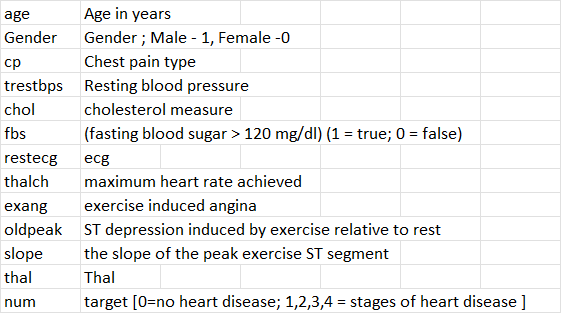

In [3]:
heart_dis.info()
# There are total 908 entries with 13 columns
# There are missing values in 'oldpeak' column only
# 'age','trestbps','chol','thalch','num' columns are of *int64* dtype
# 'sex','cp','restecg','exang','slope','thal' columns are of *object* dtype
# 'fbs' column is of *bool* dtype
# 'oldpeak' column is of *float64* dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
heart_dis.describe()
# There are outliers present in some columns
# Oldpeak column has non null values and very low variance

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

In [5]:
heart_dis['exang'].unique()
# As we can see, 'exang' column has some incosistent data
# Also the dtype of the column 'exang' is in *object*, although it has to be in *bool*

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [6]:
heart_dis['exang'] = heart_dis['exang'].apply(lambda x: True if x == 'TURE' else x)
heart_dis['exang'] = heart_dis['exang'].apply(lambda x: False if x == 'FALSE' else x)
heart_dis['exang'].unique()

# Now the incosistent data has been converted to the consistent data

array([False,  True])

In [7]:
heart_dis['exang'].dtype
# Even the dtype of the column 'exang' is also changed to 'bool'

dtype('bool')

In [8]:
# Lets check for the duplicate values
heart_dis[heart_dis.duplicated(keep=False)]

age   sex           cp  trestbps  chol    fbs           restecg  thalch  \
764   58  Male  non-anginal       150   219  False  st-t abnormality     118   
765   58  Male  non-anginal       150   219  False  st-t abnormality     118   

     exang  oldpeak        slope    thal  num  
764   True      0.0  downsloping  normal    2  
765   True      0.0  downsloping  normal    2

In [9]:
heart_dis.drop_duplicates(inplace = True)
heart_dis.shape

(907, 13)

In [10]:
# Lets check for the missing values
heart_dis.isnull().sum()
# 62 entries in the 'oldpeak' column are missing

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

<Axes: >

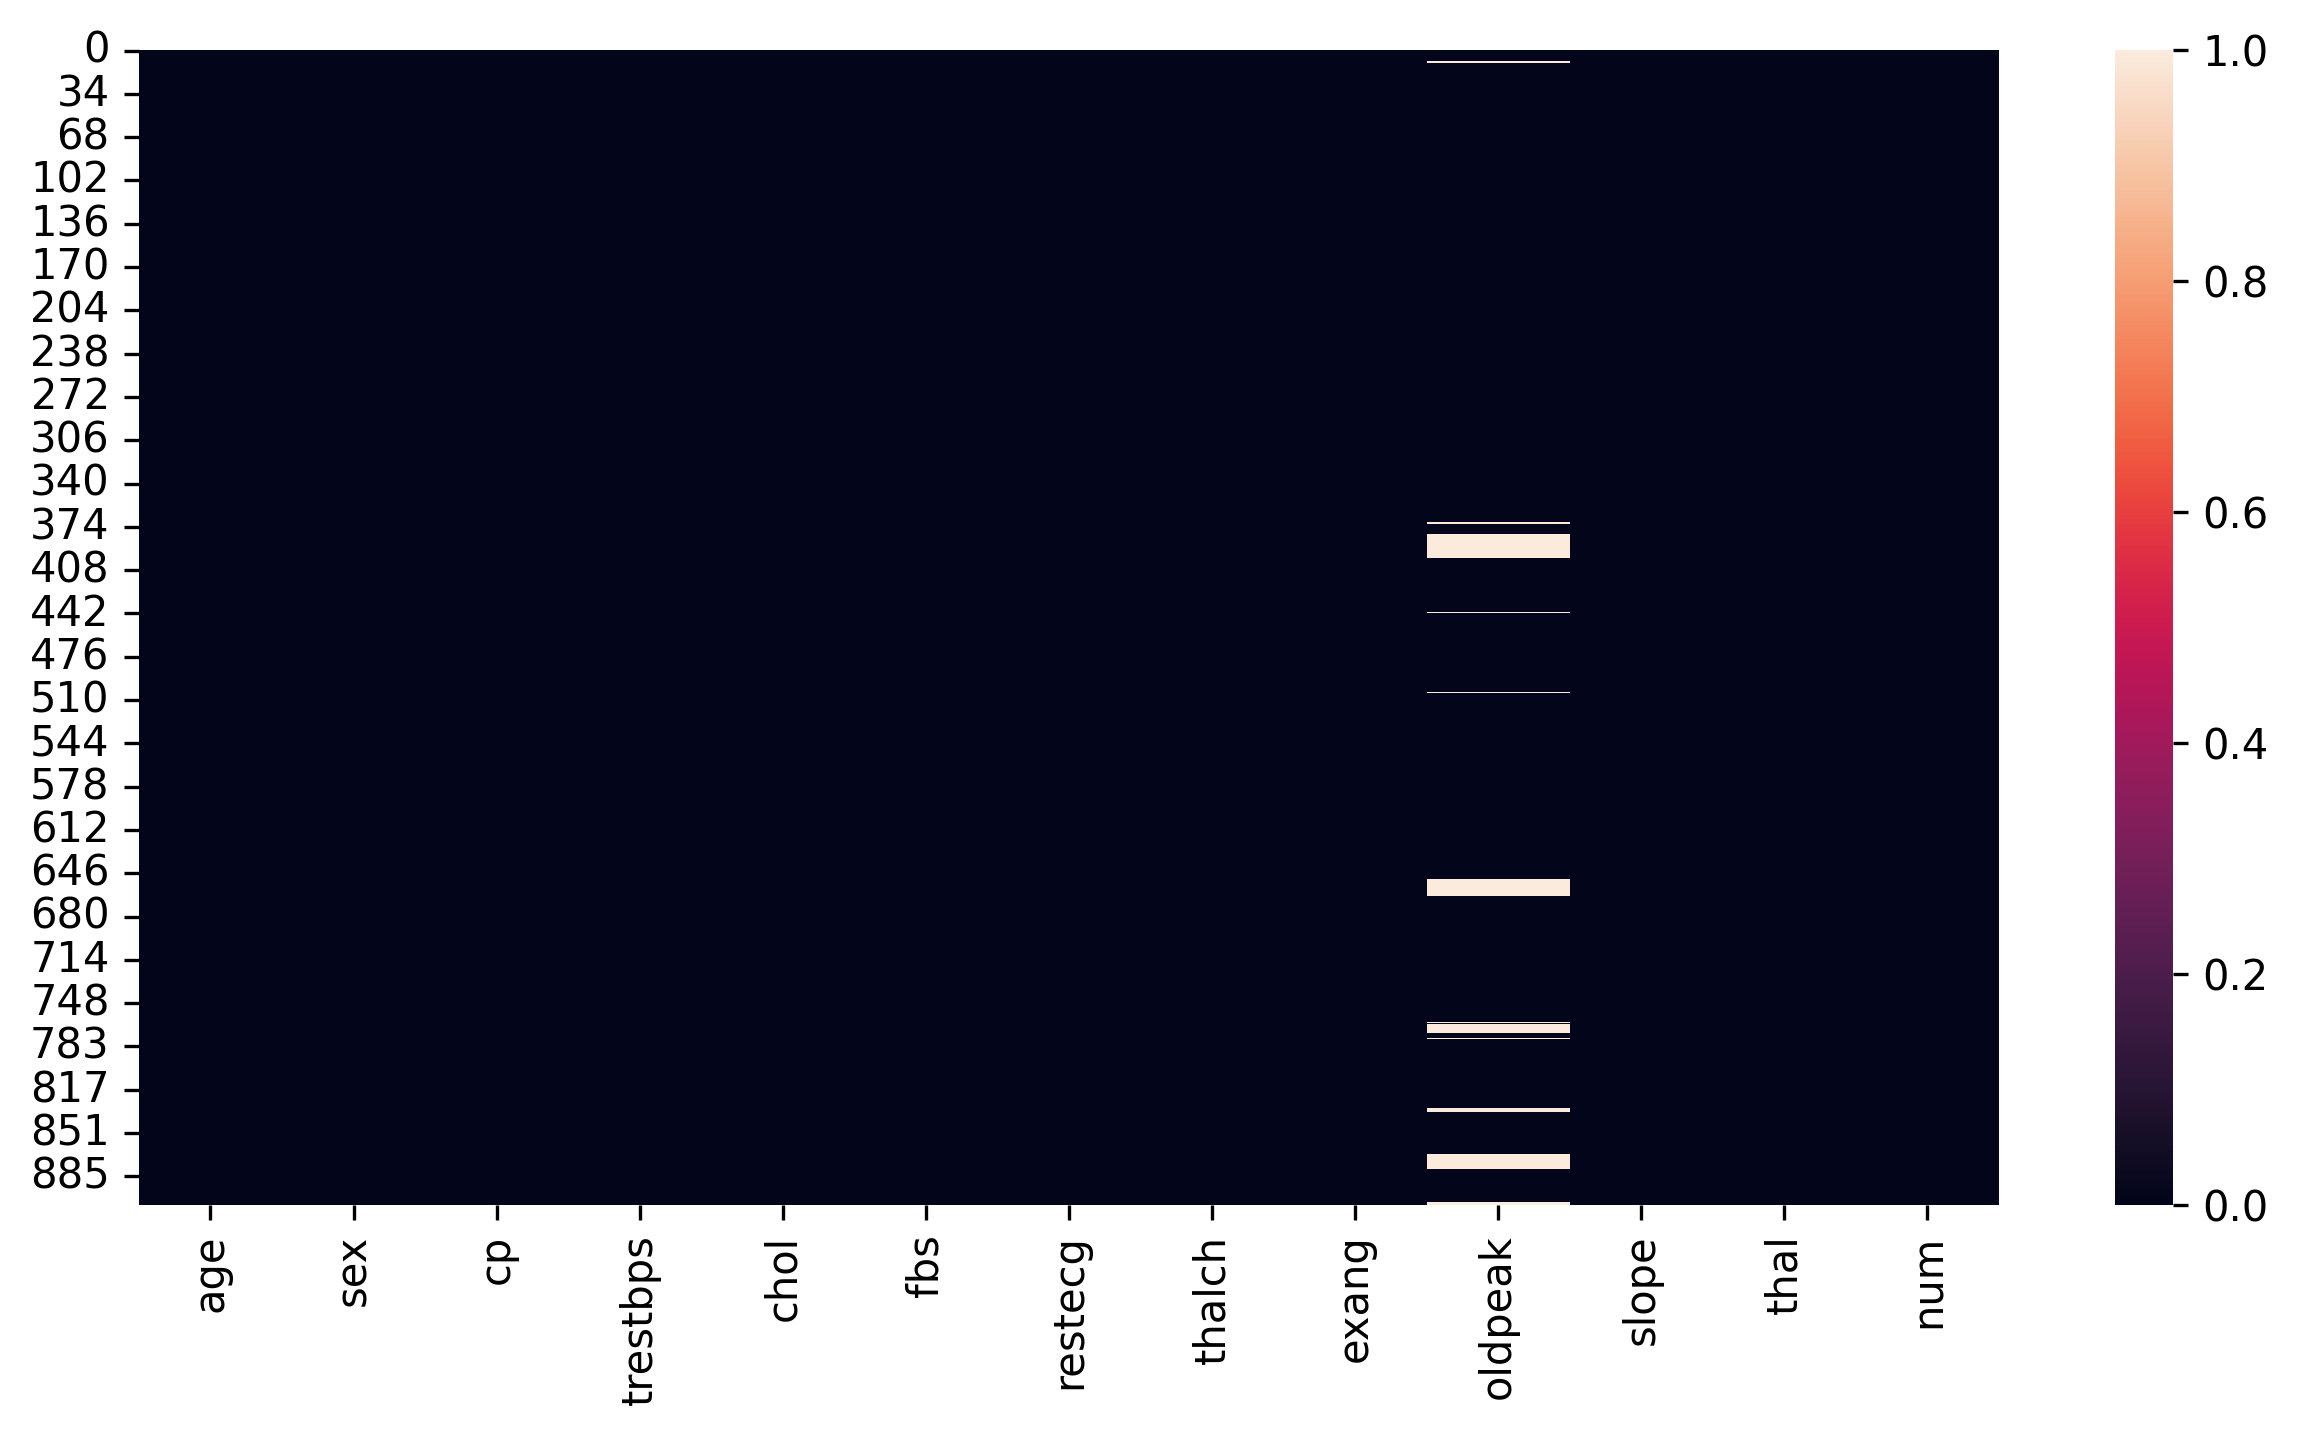

In [11]:
sns.heatmap(heart_dis.isna())

In [12]:
(heart_dis['oldpeak'].isna().sum()/len(heart_dis))*100
# 0 to 5% missing values : drop rows
# 6 to 45 % : replace with missing values <-
# 50 %: drop the column

# Hence we need to replace the missing values in the 'oldpeak'

6.835722160970231

<Axes: >

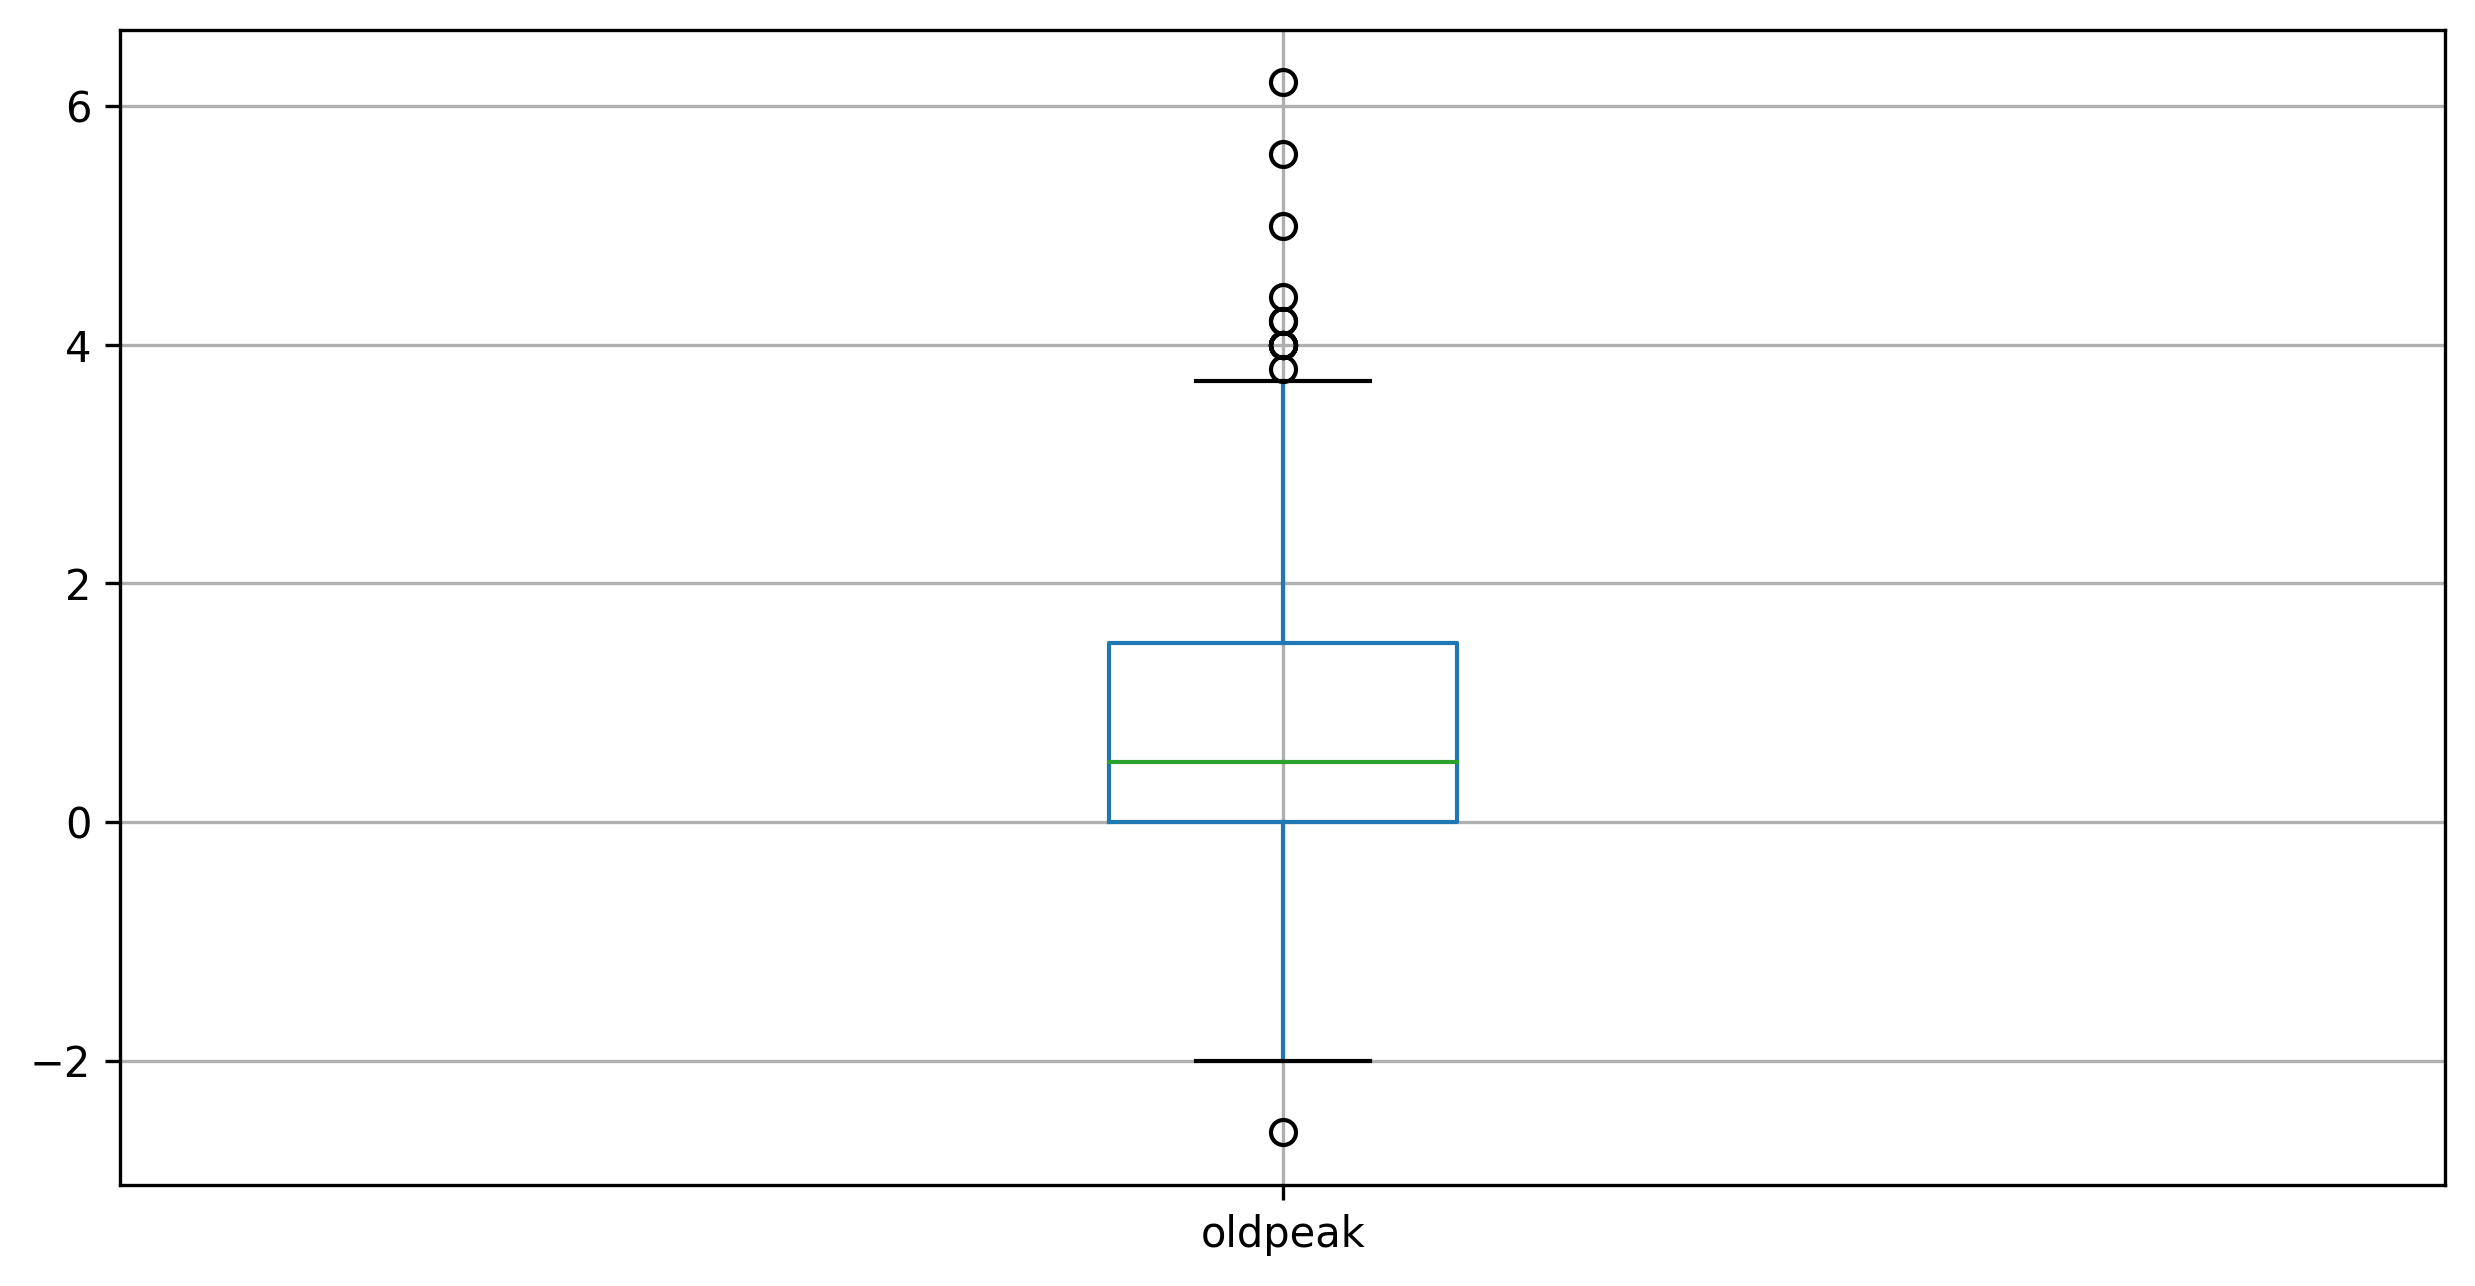

In [13]:
heart_dis[['oldpeak']].boxplot()
# As we can see 'oldpeak' column has outliers present hence we need to replace the missing values with median.

In [14]:
heart_dis['oldpeak'].fillna(heart_dis['oldpeak'].median(), inplace=True)
heart_dis.isna().sum()
# Hence we have handled the missing values from the 'oldpeak' column
# Now the whole dataset does not have any missing values.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

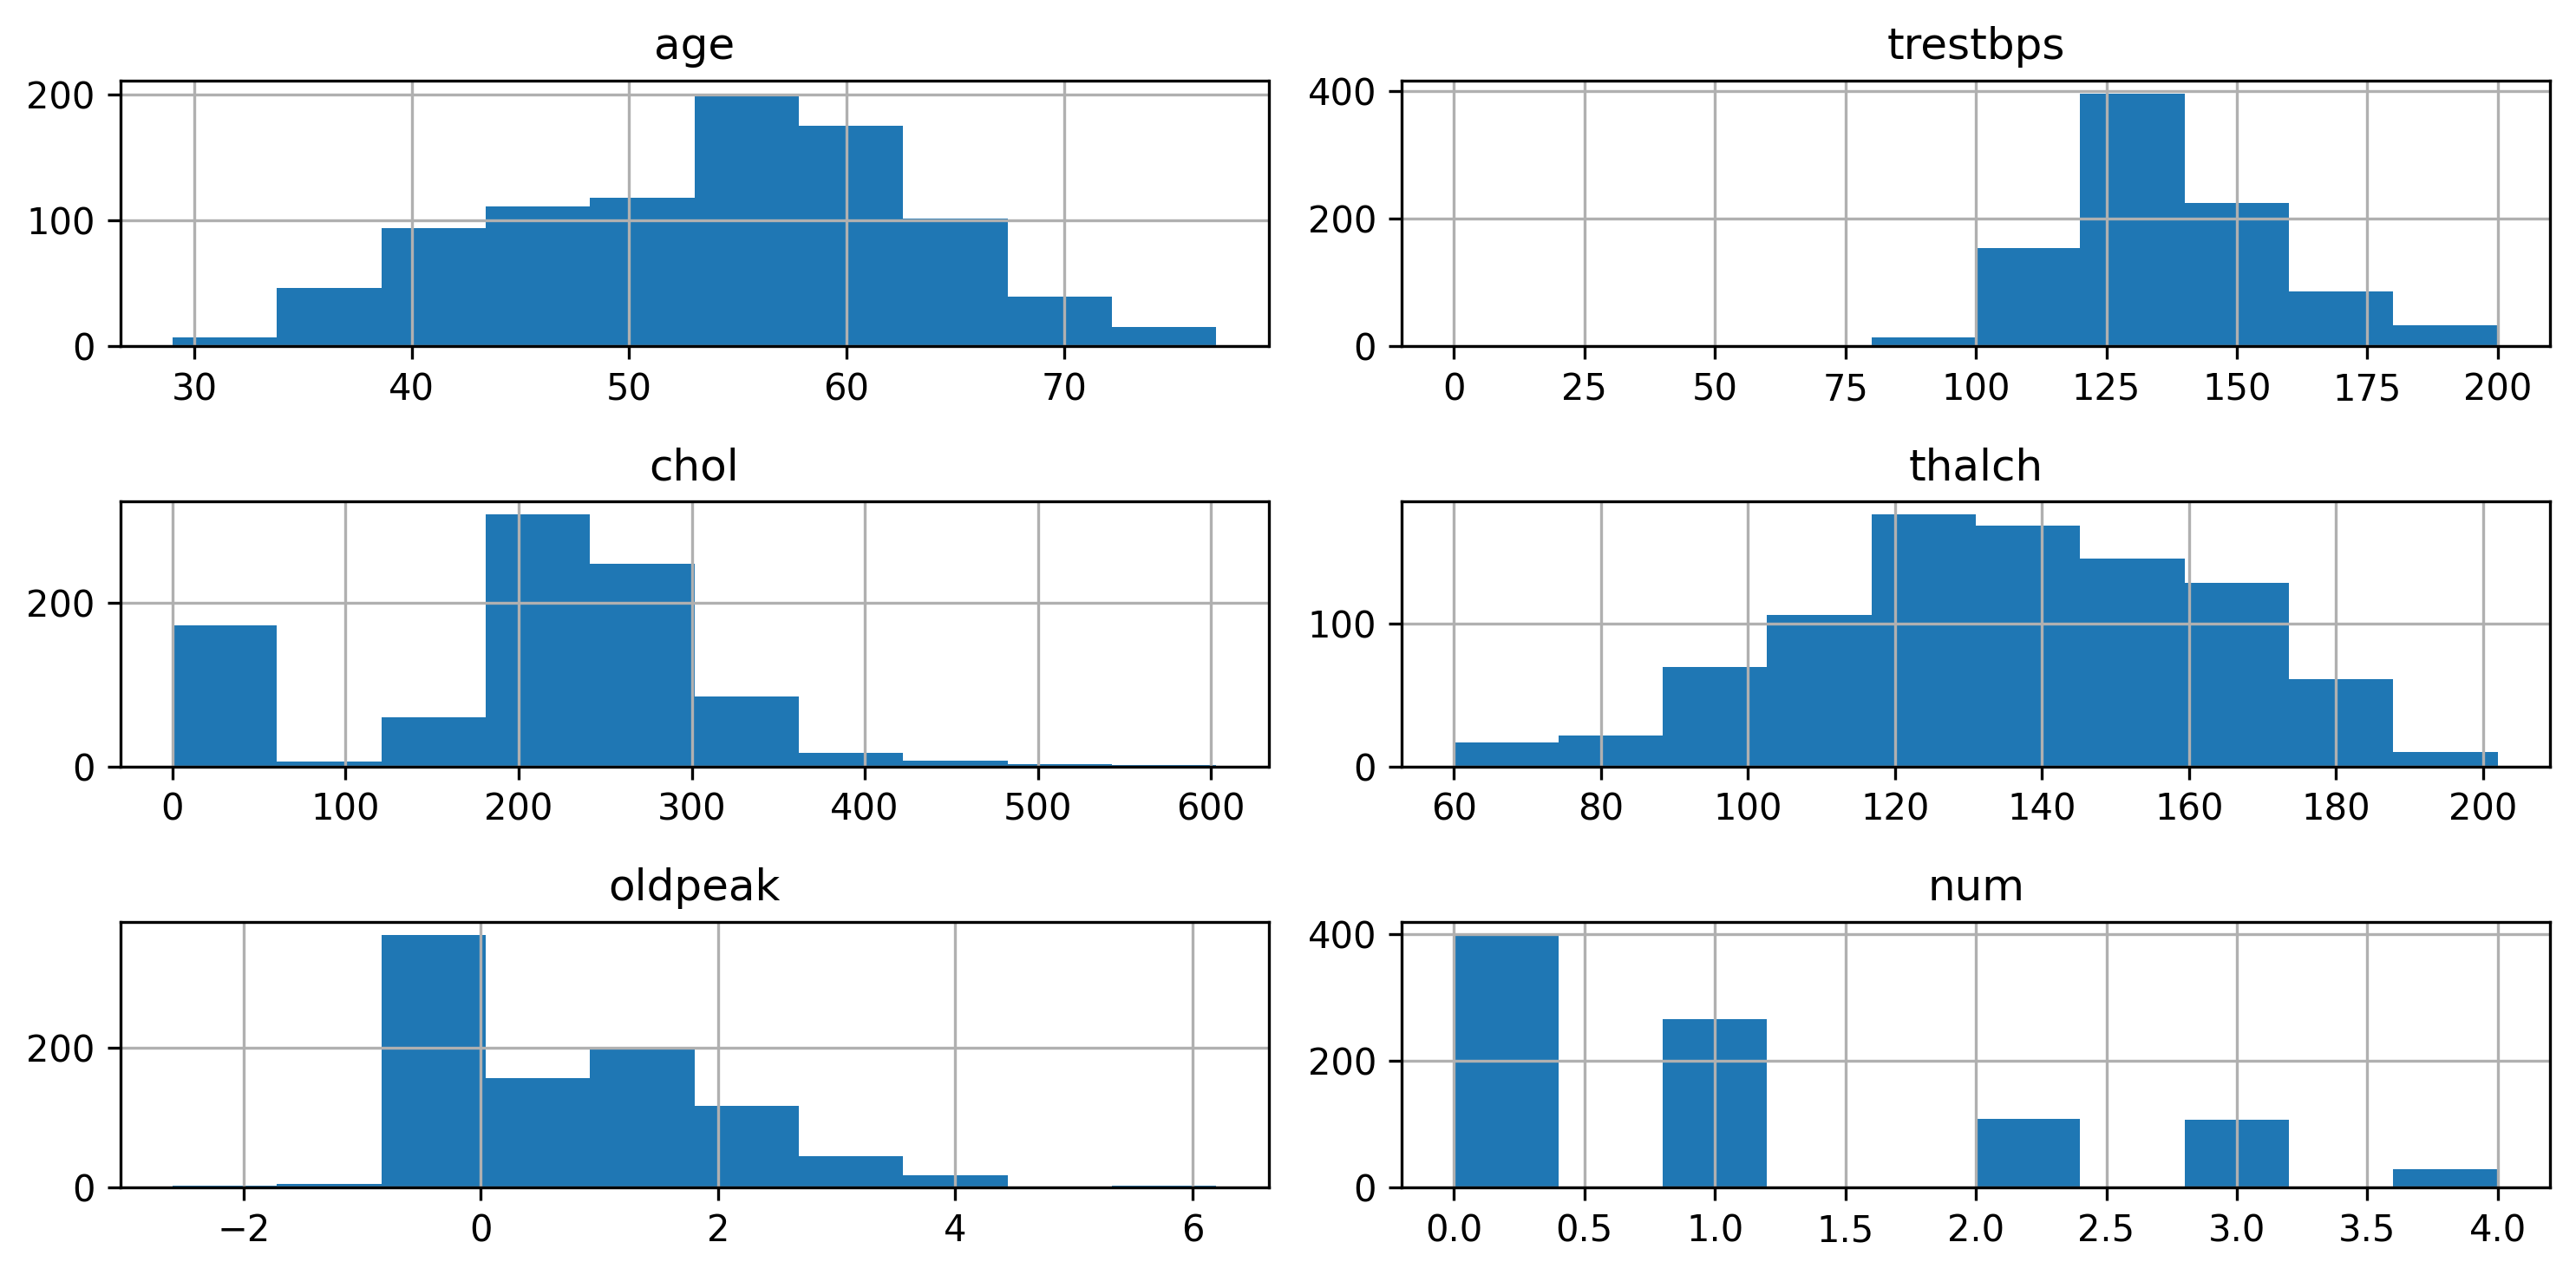

In [ ]:
# Histograms
heart_dis.hist()
plt.tight_layout()

<Axes: >

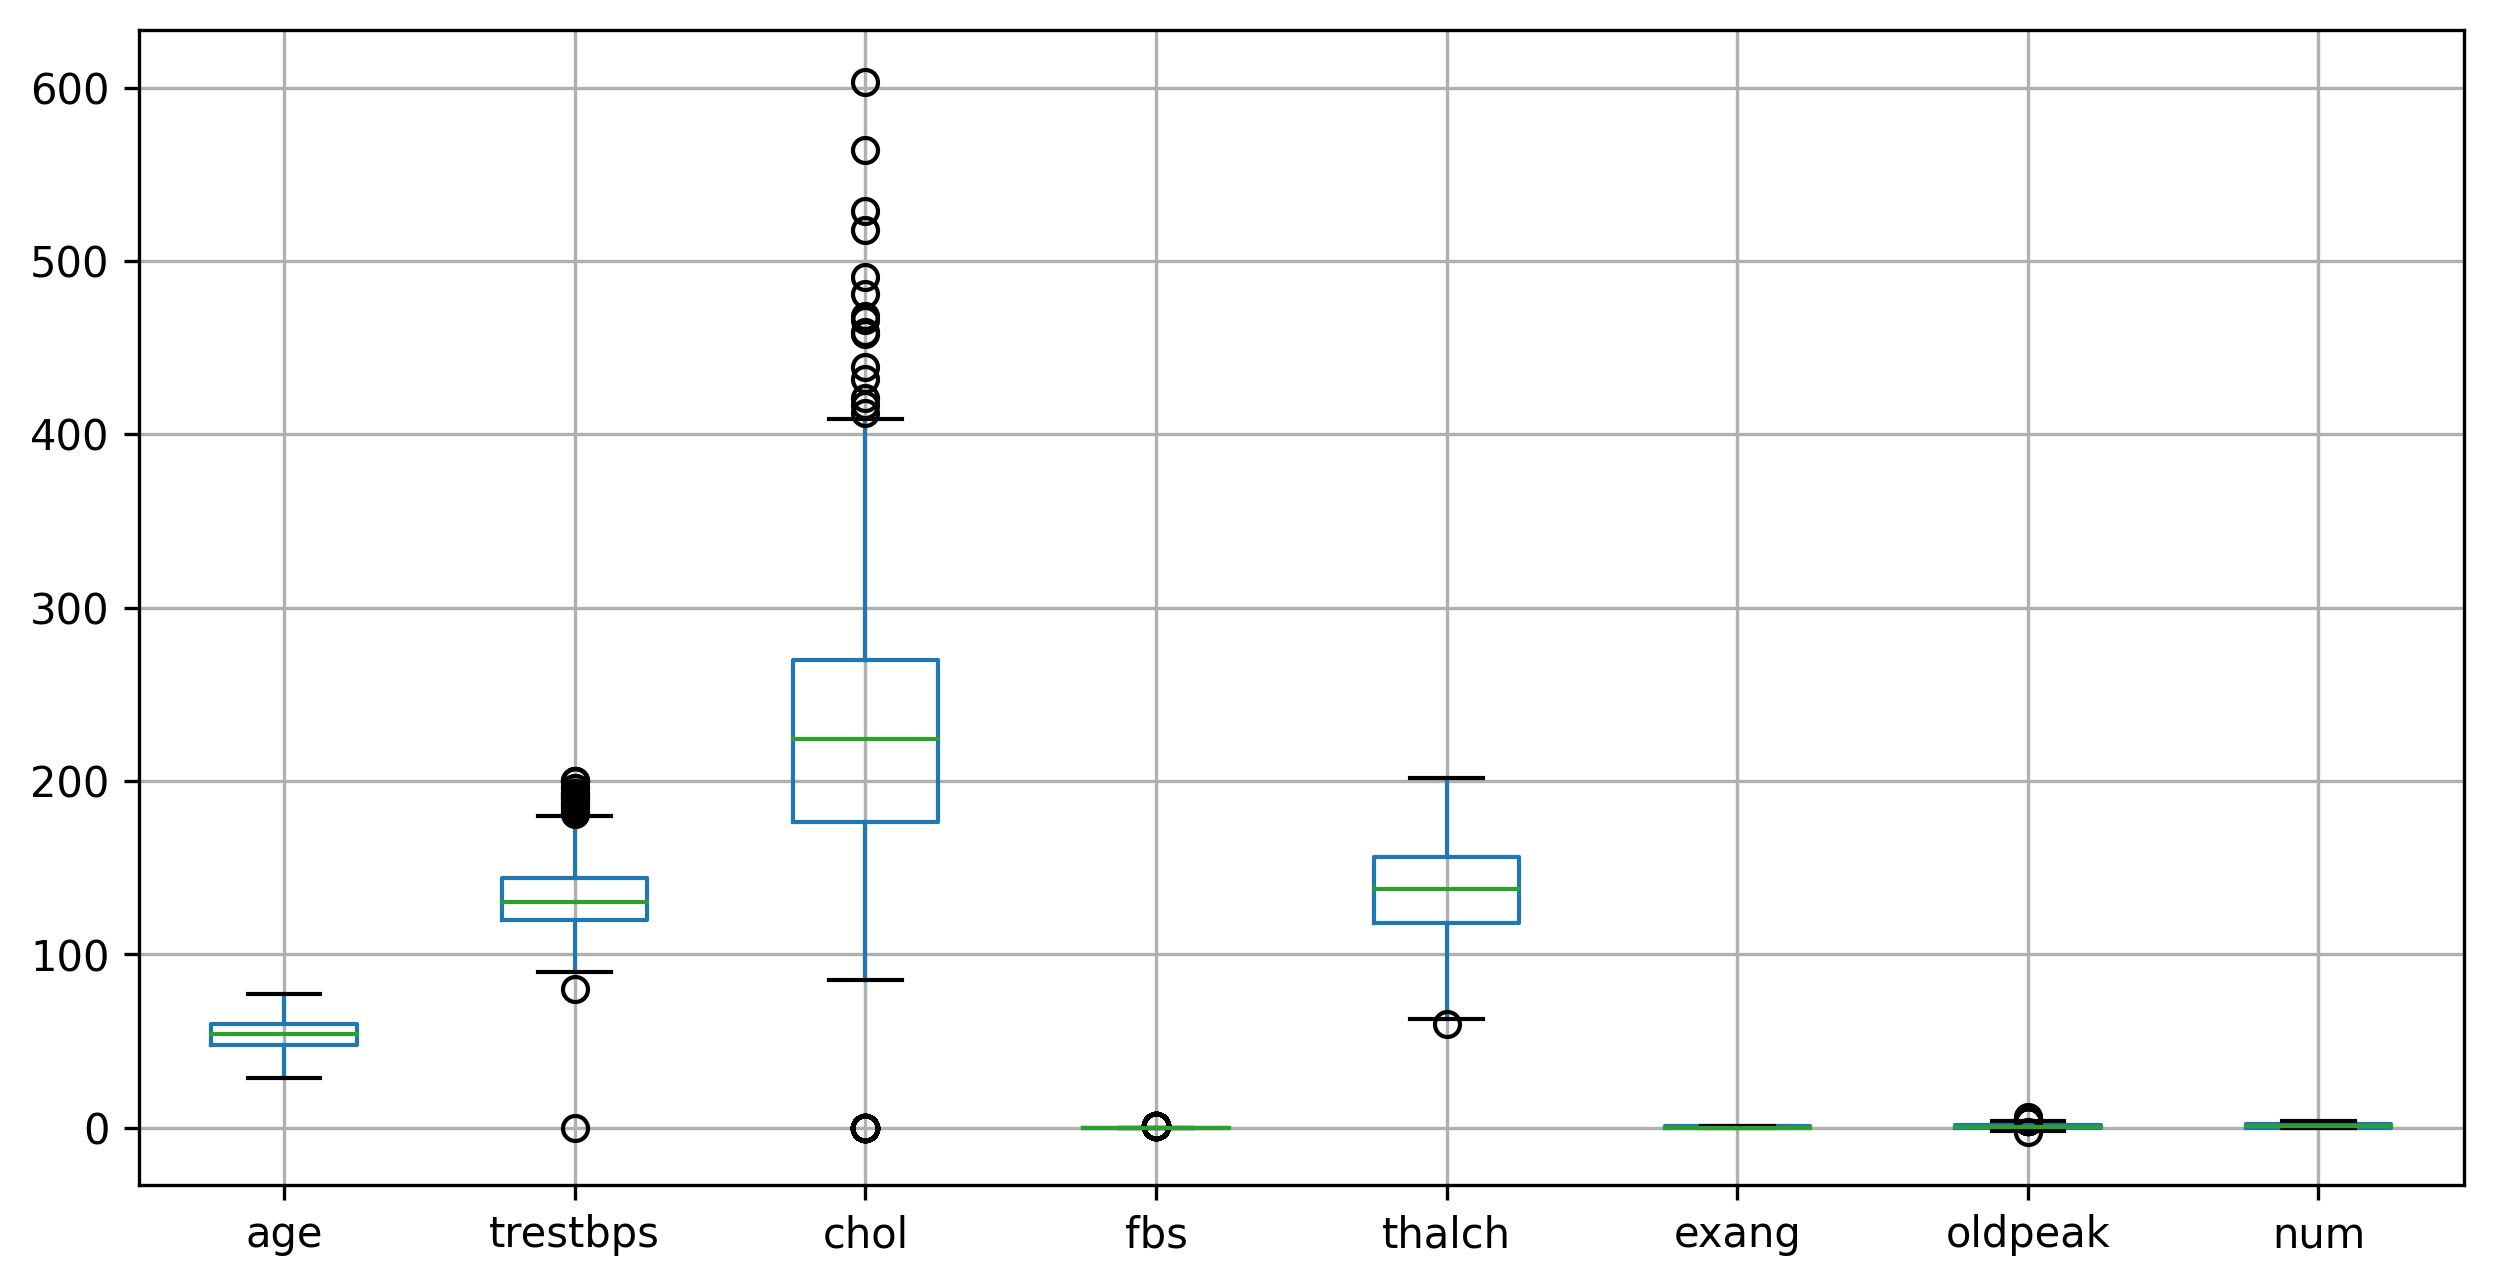

In [ ]:
# Boxplot
heart_dis.boxplot()
# 5 numerical columns have outliers present

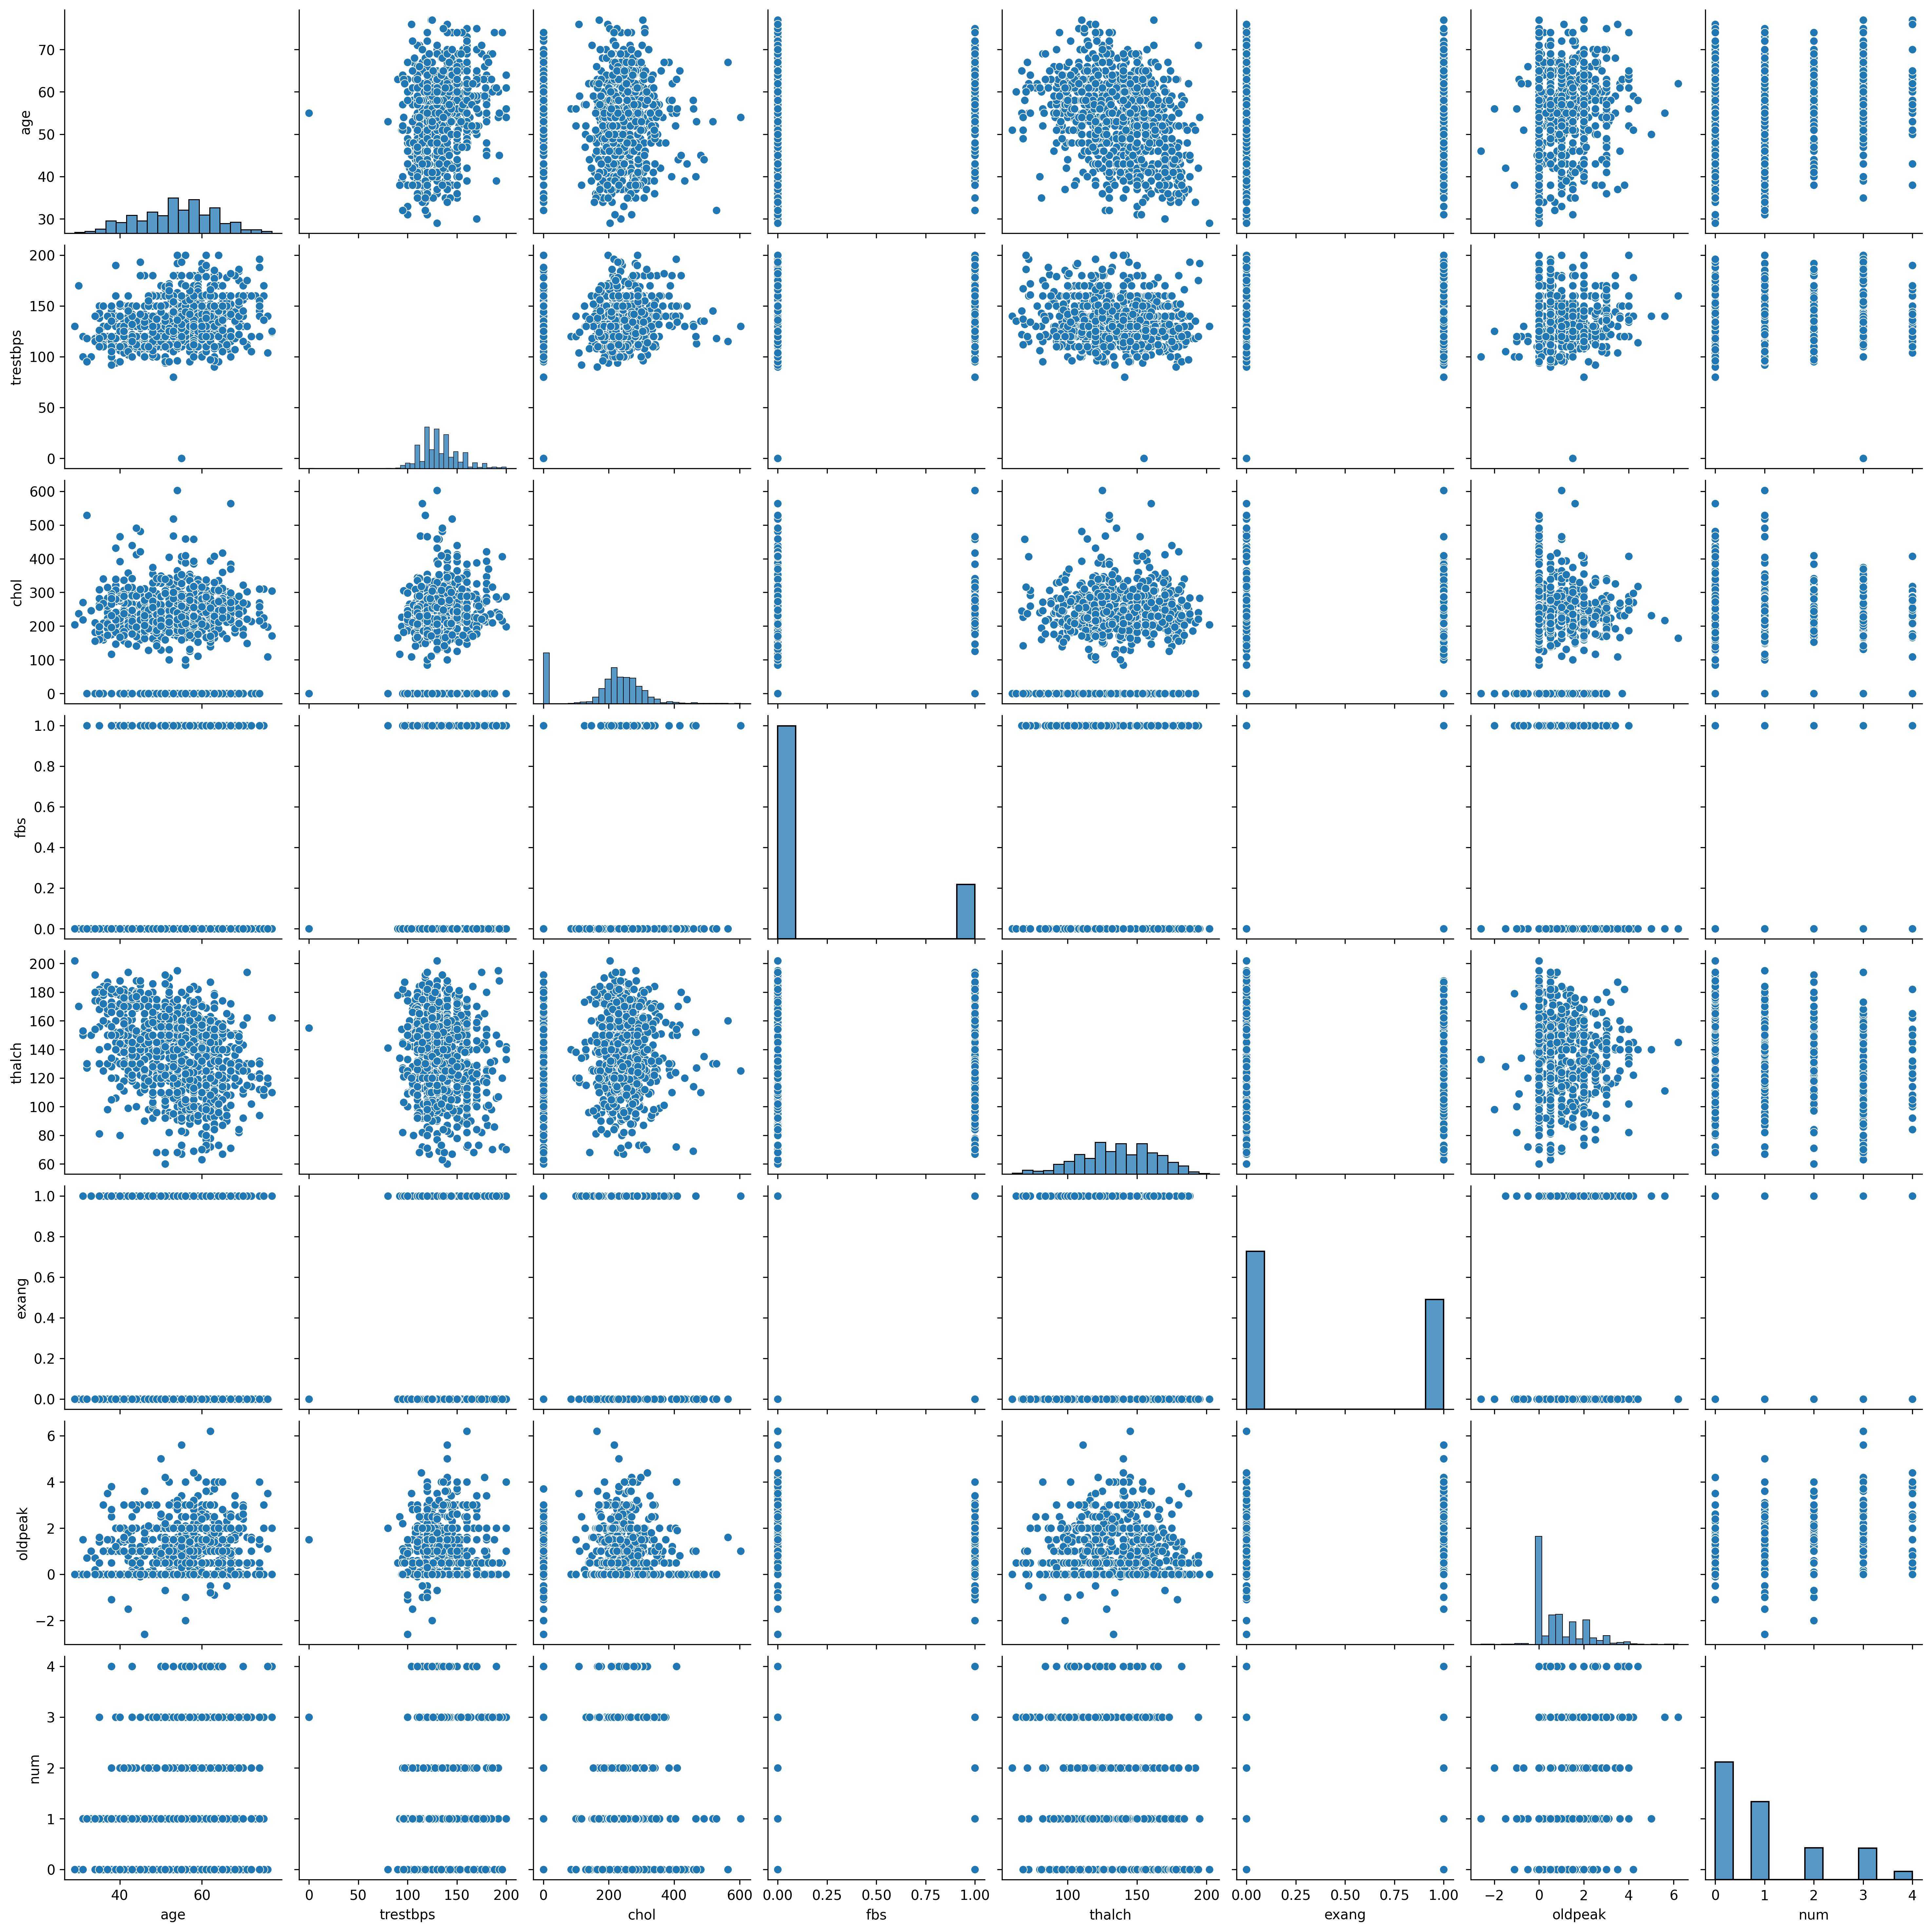

In [ ]:
sns.pairplot(heart_dis)

In [15]:
heart_dis.corr(numeric_only = True)

age  trestbps      chol       fbs    thalch     exang  \
age       1.000000  0.253709 -0.100059  0.177004 -0.327868  0.192202   
trestbps  0.253709  1.000000  0.117392  0.112124 -0.132841  0.151086   
chol     -0.100059  0.117392  1.000000 -0.113651  0.198074 -0.037256   
fbs       0.177004  0.112124 -0.113651  1.000000 -0.065827  0.028502   
thalch   -0.327868 -0.132841  0.198074 -0.065827  1.000000 -0.348668   
exang     0.192202  0.151086 -0.037256  0.028502 -0.348668  1.000000   
oldpeak   0.218461  0.135775  0.032357  0.007703 -0.113296  0.357446   
num       0.326227  0.136581 -0.239065  0.156839 -0.322632  0.358837   

           oldpeak       num  
age       0.218461  0.326227  
trestbps  0.135775  0.136581  
chol      0.032357 -0.239065  
fbs       0.007703  0.156839  
thalch   -0.113296 -0.322632  
exang     0.357446  0.358837  
oldpeak   1.000000  0.407175  
num       0.407175  1.000000

<Axes: >

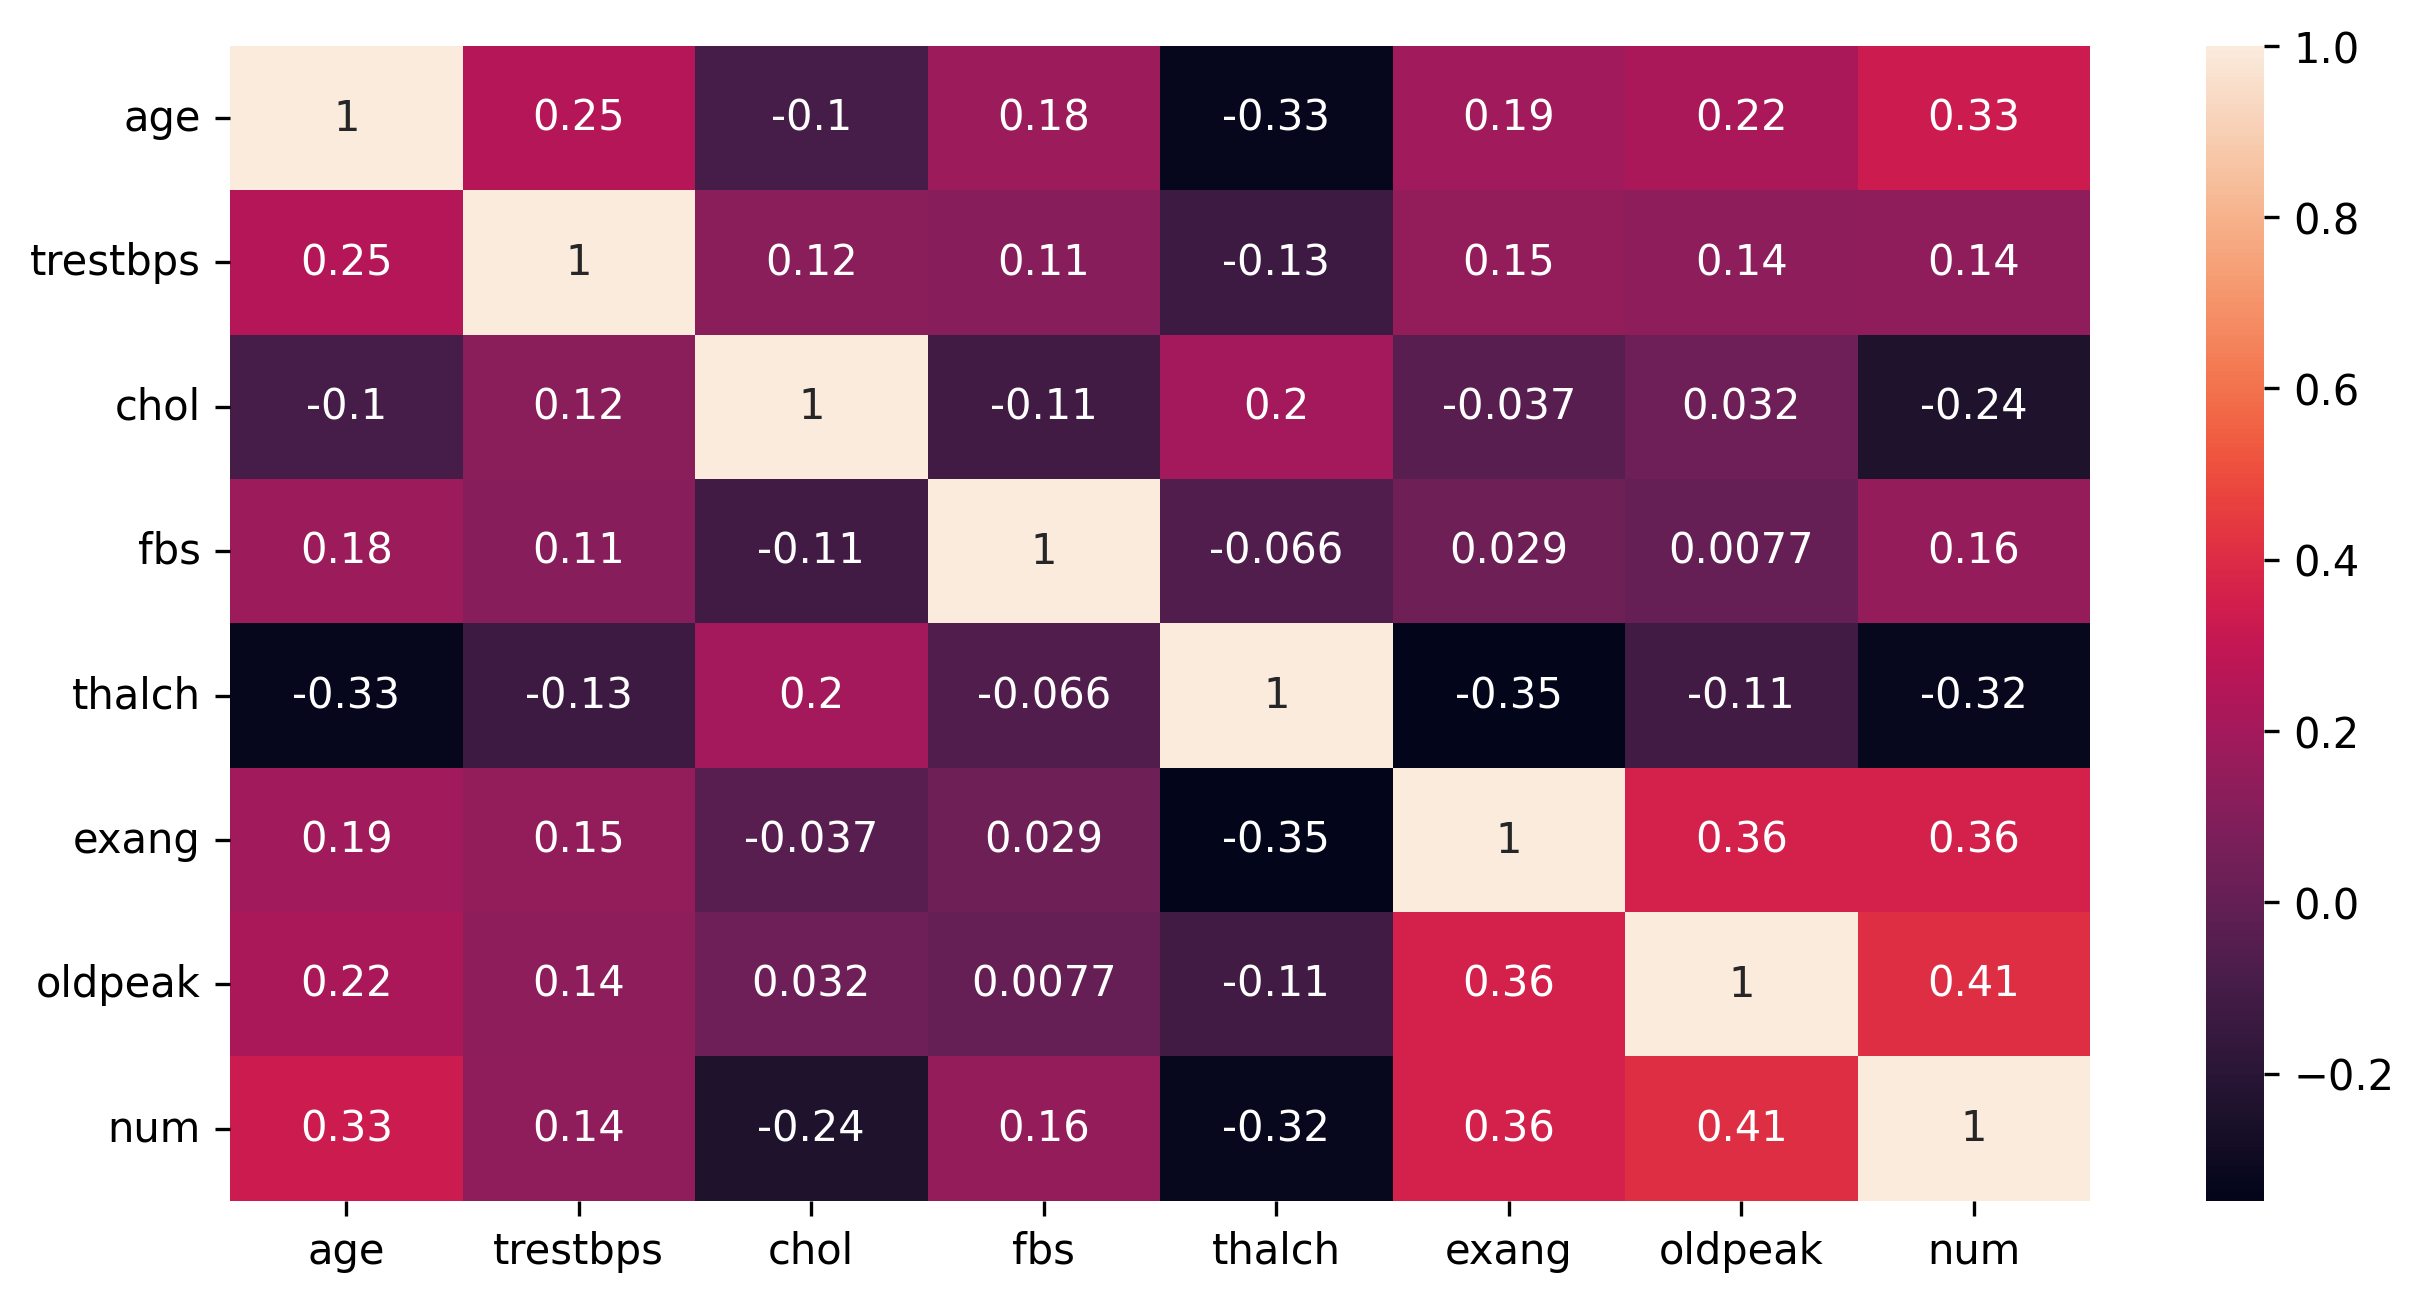

In [16]:
sns.heatmap(heart_dis.corr(numeric_only = True), annot=True)
# Each numeric column is moderately correlated or almost uncorrelated with each other

###3. Feature Engineering:
* If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.


In [17]:
# As the target variable 'num' is already in numeric dtype, we do not have to use Label Encoding
# But some of the independent variables are in categorical dtype, hence we have to use One Hot Encoding
heart = pd.get_dummies(data = heart_dis, columns = ['sex','cp','restecg','slope','thal'], dtype = 'int64')
heart

age  trestbps  chol    fbs  thalch  exang  oldpeak  num  sex_Female  \
0     63       145   233   True     150  False      2.3    0           0   
1     41       135   203  False     132  False      0.0    0           0   
2     57       140   192  False     148  False      0.4    0           0   
3     52       118   186  False     190  False      0.0    0           0   
4     57       110   201  False     126   True      1.5    0           0   
..   ...       ...   ...    ...     ...    ...      ...  ...         ...   
903   53       125     0  False     120  False      1.5    4           0   
904   62       166   170  False     120   True      3.0    4           0   
905   56       170     0  False     123   True      2.5    4           0   
906   56       144   208   True     105   True      0.5    4           0   
907   57       142   277   True     182  False      0.5    4           0   

     sex_Male  ...  cp_typical angina  restecg_lv hypertrophy  restecg_normal  \
0           1  ...                  1                       1               0   
1           1  ...                  0                       0               1   
2           1  ...                  0                       0               1   
3           1  ...                  1                       1               0   
4           1  ...                  0                       0               1   
..        ...  ...                ...                     ...             ...   
903         1  ...                  0                       0               1   
904         1  ...                  0                       0               0   
905         1  ...                  0                       1               0   
906         1  ...                  0                       0               0   
907         1  ...                  0                       0               0   

     restecg_st-t abnormality  slope_downsloping  slope_flat  slope_upsloping  \
0                           0                  1           0                0   
1                           0                  0           1                0   
2                           0                  0           1                0   
3                           0                  0           1                0   
4                           0                  0           1                0   
..                        ...                ...         ...              ...   
903                         0                  0           0                1   
904                         1                  0           1                0   
905                         0                  1           0                0   
906                         1                  1           0                0   
907                         1                  0           1                0   

     thal_fixed defect  thal_normal  thal_reversable defect  
0                    1            0                       0  
1                    1            0                       0  
2                    1            0                       0  
3                    1            0                       0  
4                    1            0                       0  
..                 ...          ...                     ...  
903                  0            0                       1  
904                  0            0                       1  
905                  0            1                       0  
906                  1            0                       0  
907                  0            0                       1  

[907 rows x 23 columns]

In [18]:
# 'fbs' and 'exang' are in boolean dtype, we can convert it into int64 dtype as 1 or 0.
heart['fbs'] = heart['fbs'].astype('int64')
heart['exang'] = heart['exang'].astype('int64')
heart
# Hence, All the data has been converted to the numerical form and we can proceed for the model building

age  trestbps  chol  fbs  thalch  exang  oldpeak  num  sex_Female  \
0     63       145   233    1     150      0      2.3    0           0   
1     41       135   203    0     132      0      0.0    0           0   
2     57       140   192    0     148      0      0.4    0           0   
3     52       118   186    0     190      0      0.0    0           0   
4     57       110   201    0     126      1      1.5    0           0   
..   ...       ...   ...  ...     ...    ...      ...  ...         ...   
903   53       125     0    0     120      0      1.5    4           0   
904   62       166   170    0     120      1      3.0    4           0   
905   56       170     0    0     123      1      2.5    4           0   
906   56       144   208    1     105      1      0.5    4           0   
907   57       142   277    1     182      0      0.5    4           0   

     sex_Male  ...  cp_typical angina  restecg_lv hypertrophy  restecg_normal  \
0           1  ...                  1                       1               0   
1           1  ...                  0                       0               1   
2           1  ...                  0                       0               1   
3           1  ...                  1                       1               0   
4           1  ...                  0                       0               1   
..        ...  ...                ...                     ...             ...   
903         1  ...                  0                       0               1   
904         1  ...                  0                       0               0   
905         1  ...                  0                       1               0   
906         1  ...                  0                       0               0   
907         1  ...                  0                       0               0   

     restecg_st-t abnormality  slope_downsloping  slope_flat  slope_upsloping  \
0                           0                  1           0                0   
1                           0                  0           1                0   
2                           0                  0           1                0   
3                           0                  0           1                0   
4                           0                  0           1                0   
..                        ...                ...         ...              ...   
903                         0                  0           0                1   
904                         1                  0           1                0   
905                         0                  1           0                0   
906                         1                  1           0                0   
907                         1                  0           1                0   

     thal_fixed defect  thal_normal  thal_reversable defect  
0                    1            0                       0  
1                    1            0                       0  
2                    1            0                       0  
3                    1            0                       0  
4                    1            0                       0  
..                 ...          ...                     ...  
903                  0            0                       1  
904                  0            0                       1  
905                  0            1                       0  
906                  1            0                       0  
907                  0            0                       1  

[907 rows x 23 columns]

###4. Decision Tree Classification:
* Split the dataset into training and testing sets (e.g., using an 80-20 split).
* Implement a Decision Tree Classification model using a library like scikit-learn.
* Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).


In [19]:
# Changing the index of target column 'num' at the last
heart['target'] = heart['num']
heart.drop(columns = ['num'], inplace = True)
heart.rename(columns = {'target':'num'}, inplace = True)
heart

age  trestbps  chol  fbs  thalch  exang  oldpeak  sex_Female  sex_Male  \
0     63       145   233    1     150      0      2.3           0         1   
1     41       135   203    0     132      0      0.0           0         1   
2     57       140   192    0     148      0      0.4           0         1   
3     52       118   186    0     190      0      0.0           0         1   
4     57       110   201    0     126      1      1.5           0         1   
..   ...       ...   ...  ...     ...    ...      ...         ...       ...   
903   53       125     0    0     120      0      1.5           0         1   
904   62       166   170    0     120      1      3.0           0         1   
905   56       170     0    0     123      1      2.5           0         1   
906   56       144   208    1     105      1      0.5           0         1   
907   57       142   277    1     182      0      0.5           0         1   

     cp_asymptomatic  ...  restecg_lv hypertrophy  restecg_normal  \
0                  0  ...                       1               0   
1                  0  ...                       0               1   
2                  1  ...                       0               1   
3                  0  ...                       1               0   
4                  1  ...                       0               1   
..               ...  ...                     ...             ...   
903                1  ...                       0               1   
904                1  ...                       0               0   
905                0  ...                       1               0   
906                0  ...                       0               0   
907                1  ...                       0               0   

     restecg_st-t abnormality  slope_downsloping  slope_flat  slope_upsloping  \
0                           0                  1           0                0   
1                           0                  0           1                0   
2                           0                  0           1                0   
3                           0                  0           1                0   
4                           0                  0           1                0   
..                        ...                ...         ...              ...   
903                         0                  0           0                1   
904                         1                  0           1                0   
905                         0                  1           0                0   
906                         1                  1           0                0   
907                         1                  0           1                0   

     thal_fixed defect  thal_normal  thal_reversable defect  num  
0                    1            0                       0    0  
1                    1            0                       0    0  
2                    1            0                       0    0  
3                    1            0                       0    0  
4                    1            0                       0    0  
..                 ...          ...                     ...  ...  
903                  0            0                       1    4  
904                  0            0                       1    4  
905                  0            1                       0    4  
906                  1            0                       0    4  
907                  0            0                       1    4  

[907 rows x 23 columns]

In [28]:
# Splitting the data into set of independent variables
X = heart.iloc[:,0:22]
X.head()

age  trestbps  chol  fbs  thalch  exang  oldpeak  sex_Female  sex_Male  \
0   63       145   233    1     150      0      2.3           0         1   
1   41       135   203    0     132      0      0.0           0         1   
2   57       140   192    0     148      0      0.4           0         1   
3   52       118   186    0     190      0      0.0           0         1   
4   57       110   201    0     126      1      1.5           0         1   

   cp_asymptomatic  ...  cp_typical angina  restecg_lv hypertrophy  \
0                0  ...                  1                       1   
1                0  ...                  0                       0   
2                1  ...                  0                       0   
3                0  ...                  1                       1   
4                1  ...                  0                       0   

   restecg_normal  restecg_st-t abnormality  slope_downsloping  slope_flat  \
0               0                         0                  1           0   
1               1                         0                  0           1   
2               1                         0                  0           1   
3               0                         0                  0           1   
4               1                         0                  0           1   

   slope_upsloping  thal_fixed defect  thal_normal  thal_reversable defect  
0                0                  1            0                       0  
1                0                  1            0                       0  
2                0                  1            0                       0  
3                0                  1            0                       0  
4                0                  1            0                       0  

[5 rows x 22 columns]

In [29]:
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(X)
x

array([[ 1.00609656,  0.56818423,  0.28131786, ...,  2.03799144,
        -0.85880609, -0.78533801],
       [-1.39644661,  0.07784827,  0.01369116, ...,  2.03799144,
        -0.85880609, -0.78533801],
       [ 0.35085751,  0.32301625, -0.08443863, ...,  2.03799144,
        -0.85880609, -0.78533801],
       ...,
       [ 0.241651  ,  1.79402415, -1.79724952, ..., -0.4906792 ,
         1.16440721, -0.78533801],
       [ 0.241651  ,  0.51915064,  0.05829561, ...,  2.03799144,
        -0.85880609, -0.78533801],
       [ 0.35085751,  0.42108344,  0.67383702, ..., -0.4906792 ,
        -0.85880609,  1.27333707]])

In [30]:
# Splitting the data into target variable set
Y = heart.iloc[:,-1]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: num, dtype: int64

In [31]:
Y.unique()

array([0, 1, 2, 3, 4])

In [34]:
# Splitting the data into training and testing dataset. 20% data kept aside for testing
x_train, x_test, y_train, y_test = train_test_split(x,Y, test_size = 0.2, random_state = 0)

In [35]:
x_train

array([[-1.83327264, -0.16731971, -0.25393554, ..., -0.4906792 ,
         1.16440721, -0.78533801],
       [-1.39644661, -0.4124877 ,  0.6024699 , ..., -0.4906792 ,
        -0.85880609,  1.27333707],
       [ 0.67847703, -1.63832761,  0.41513121, ..., -0.4906792 ,
         1.16440721, -0.78533801],
       ...,
       [ 0.1324445 ,  0.32301625,  0.83441304, ..., -0.4906792 ,
         1.16440721, -0.78533801],
       [ 0.56927053,  0.32301625, -1.79724952, ..., -0.4906792 ,
        -0.85880609,  1.27333707],
       [ 0.1324445 ,  2.28436012,  1.11988152, ..., -0.4906792 ,
         1.16440721, -0.78533801]])

In [36]:
y_train

372    0
304    0
523    1
85     0
501    1
      ..
836    3
192    0
629    1
559    1
684    2
Name: num, Length: 725, dtype: int64

#### Building Decision Tree Classifier using entropy criteria

In [37]:
fn = list(X.columns)
cn = ['0','1','2','3','4']

In [55]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred = model.predict(x_test)
y_pred

array([3, 1, 1, 2, 0, 0, 0, 3, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 3, 1,
       0, 0, 1, 0, 1, 2, 0, 0, 0, 3, 2, 0, 2, 3, 2, 2, 1, 1, 3, 2, 0, 0,
       0, 1, 1, 0, 0, 3, 3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 2, 1, 3, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1,
       0, 1, 0, 0, 3, 2, 0, 1, 0, 0, 0, 0, 4, 0, 3, 1, 0, 1, 0, 0, 2, 2,
       2, 0, 1, 1, 1, 3, 0, 3, 2, 3, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 0, 2, 3, 2, 4, 0, 0, 1, 0, 0, 0, 4, 0, 2, 2, 0, 0, 1, 0, 1, 0,
       3, 0, 0, 0, 0, 0, 3, 1, 3, 1, 3, 2, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0,
       2, 2, 1, 0, 2, 2])

In [58]:
print(classification_report(y_true=y_test, y_pred= y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73        76
           1       0.53      0.35      0.42        60
           2       0.33      0.52      0.41        23
           3       0.27      0.32      0.29        19
           4       0.00      0.00      0.00         4

    accuracy                           0.53       182
   macro avg       0.37      0.39      0.37       182
weighted avg       0.54      0.53      0.52       182



In [68]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.527


In [63]:
from sklearn.metrics import precision_score
print('Precision: %.3f' % precision_score(y_test, y_pred, average='weighted'))

Precision: 0.538


In [66]:
from sklearn.metrics import recall_score
print('Sensitivity/Recall: %.3f' % recall_score(y_test, y_pred, average='weighted'))

Sensitivity/Recall: 0.527


In [80]:
from sklearn.metrics import f1_score
print('F1-score: %.3f' % f1_score(y_test, y_pred, average='weighted'))

F1-score: 0.524


In [78]:
from sklearn.metrics import roc_auc_score
y_pred_prob = model.predict_proba(x_test)
print('ROC-AUC score: %.3f' % roc_auc_score(y_test, y_pred_prob, multi_class='ovr'))

ROC-AUC score: 0.629


###5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.


* Max Depth = 3

In [38]:
model_en_3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_split = 50)
model_en_3.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=50)

[Text(0.4583333333333333, 0.875, 'cp_asymptomatic <= -0.092\nentropy = 1.93\nsamples = 725\nvalue = [323, 205, 85, 88, 24]\nclass = 0'),
 Text(0.25, 0.625, 'oldpeak <= 1.023\nentropy = 1.281\nsamples = 336\nvalue = [243, 54, 15, 20, 4]\nclass = 0'),
 Text(0.16666666666666666, 0.375, 'thalch <= -1.137\nentropy = 1.07\nsamples = 299\nvalue = [231, 45, 7, 15, 1]\nclass = 0'),
 Text(0.08333333333333333, 0.125, 'entropy = 1.875\nsamples = 31\nvalue = [14, 5, 2, 9, 1]\nclass = 0'),
 Text(0.25, 0.125, 'entropy = 0.886\nsamples = 268\nvalue = [217, 40, 5, 6, 0]\nclass = 0'),
 Text(0.3333333333333333, 0.375, 'entropy = 2.185\nsamples = 37\nvalue = [12, 9, 8, 5, 3]\nclass = 0'),
 Text(0.6666666666666666, 0.625, 'oldpeak <= 0.834\nentropy = 2.104\nsamples = 389\nvalue = [80, 151, 70, 68, 20]\nclass = 1'),
 Text(0.5, 0.375, 'exang <= 0.183\nentropy = 2.005\nsamples = 275\nvalue = [74, 111, 43, 39, 8]\nclass = 1'),
 Text(0.4166666666666667, 0.125, 'entropy = 1.989\nsamples = 125\nvalue = [51, 37, 2

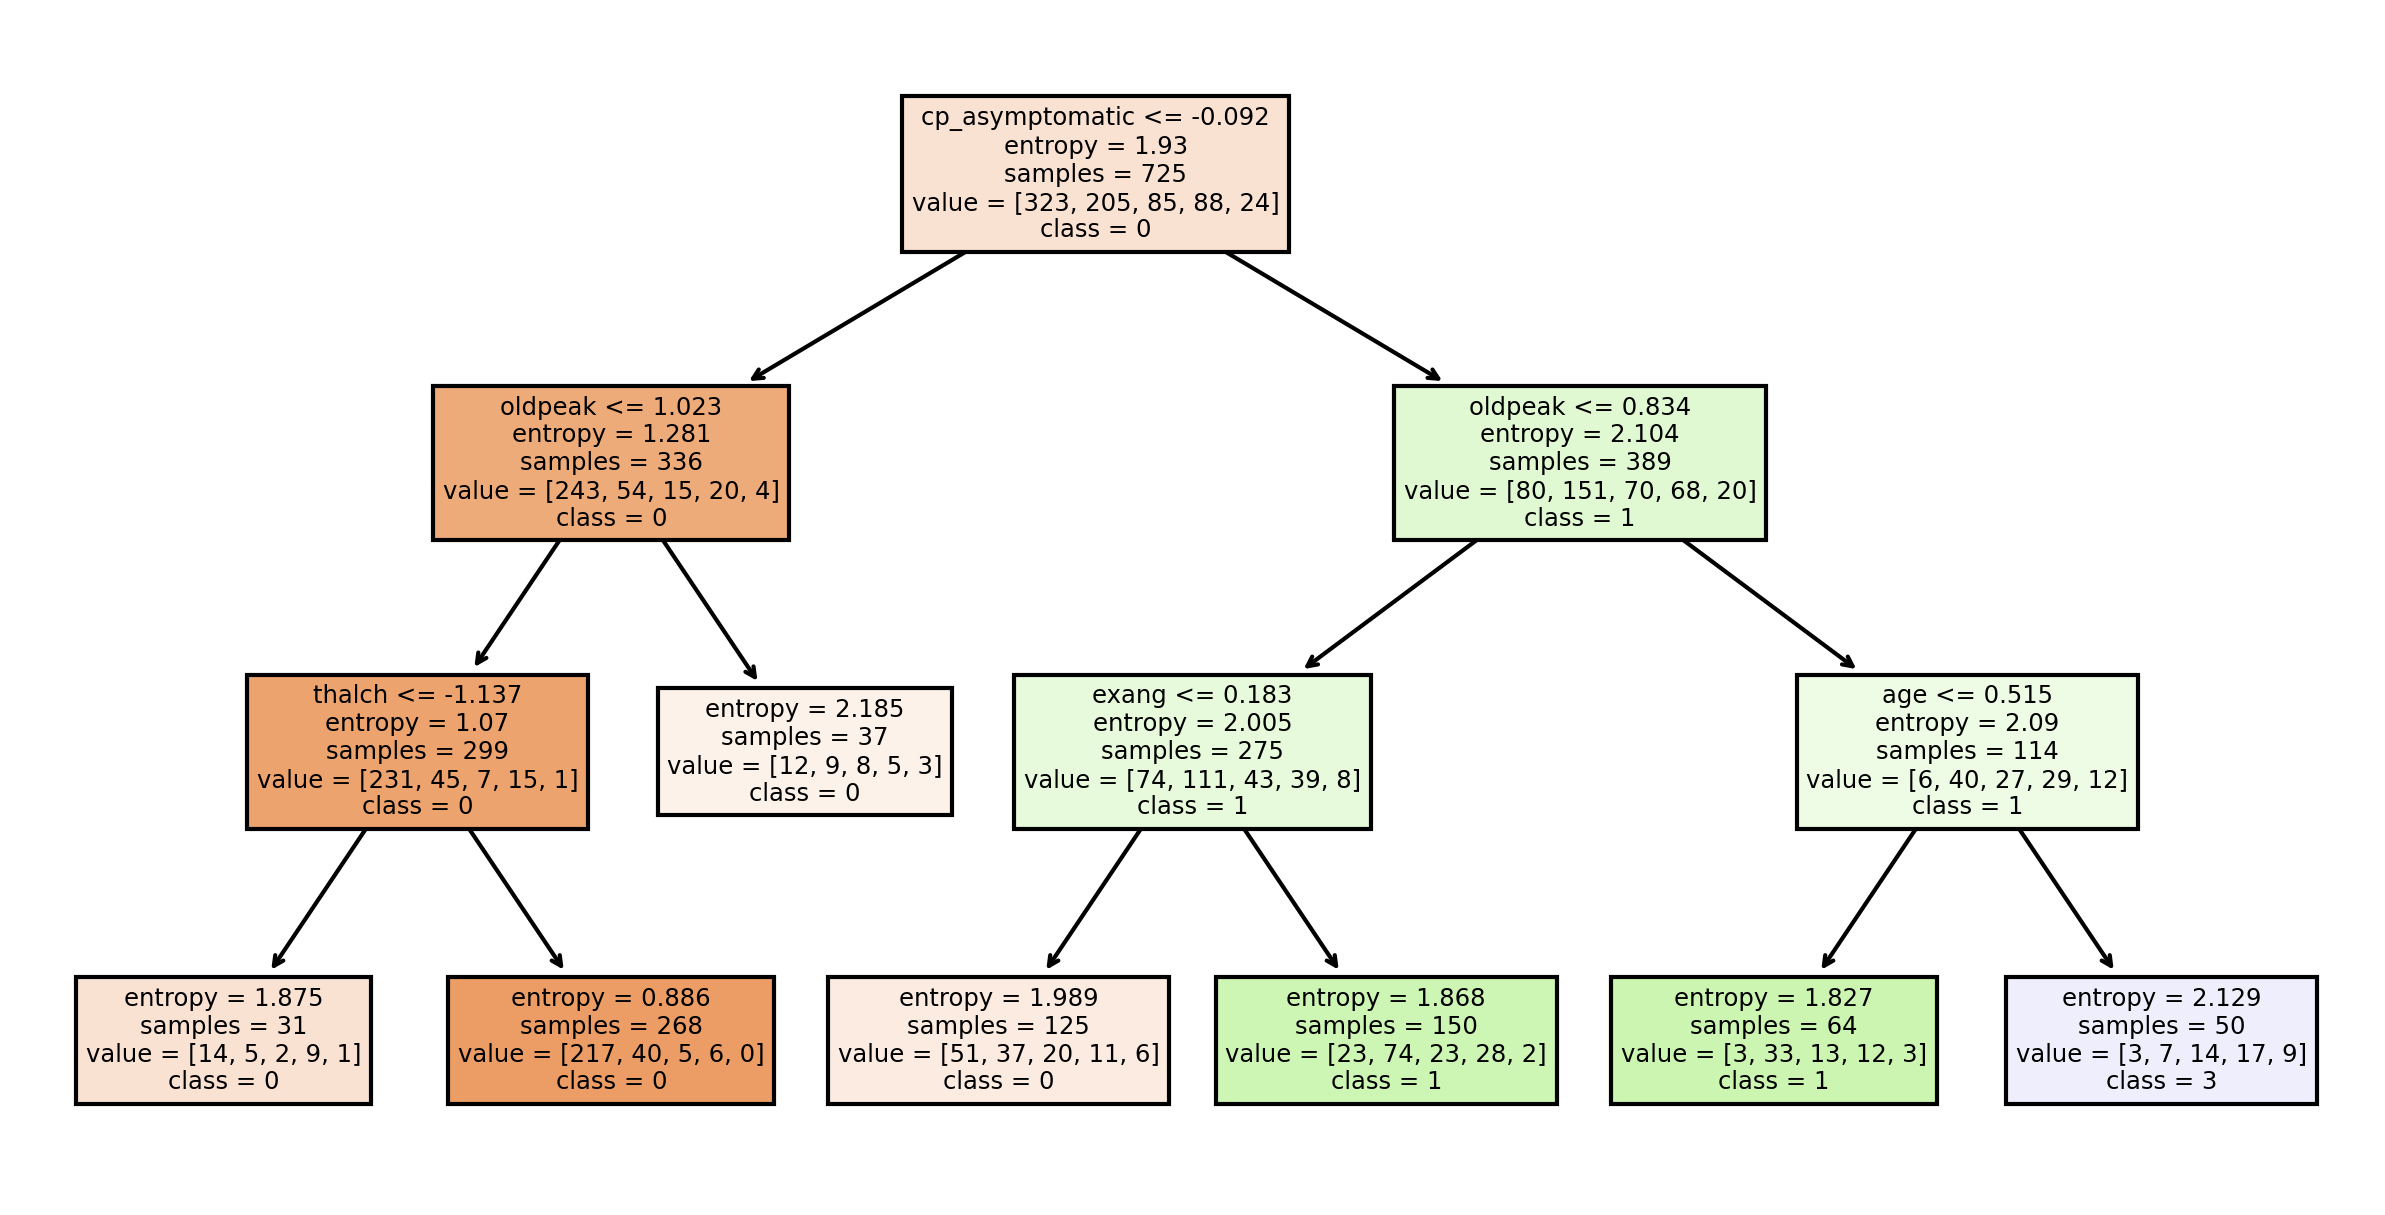

In [39]:
tree.plot_tree(model_en_3,
               feature_names = fn,
               class_names = cn,
               filled = True)
# Only 3 classes can be identify

In [40]:
preds = model_en_3.predict(x_test)
pd.Series(preds).value_counts()

0    121
1     48
3     13
Name: count, dtype: int64

In [41]:
pd.crosstab(y_test, preds)

col_0   0   1  3
num             
0      68   6  2
1      32  25  3
2      12   7  4
3       8   9  2
4       1   1  2

In [42]:
# Accuracy
np.mean(preds == y_test)
# Only 52% accuracy

0.521978021978022

* Max Depth = 4

In [44]:
model_en_4 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_split = 50)
model_en_4.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=50)

[Text(0.38095238095238093, 0.9, 'cp_asymptomatic <= -0.092\nentropy = 1.93\nsamples = 725\nvalue = [323, 205, 85, 88, 24]\nclass = 0'),
 Text(0.14285714285714285, 0.7, 'oldpeak <= 1.023\nentropy = 1.281\nsamples = 336\nvalue = [243, 54, 15, 20, 4]\nclass = 0'),
 Text(0.09523809523809523, 0.5, 'thalch <= -1.137\nentropy = 1.07\nsamples = 299\nvalue = [231, 45, 7, 15, 1]\nclass = 0'),
 Text(0.047619047619047616, 0.3, 'entropy = 1.875\nsamples = 31\nvalue = [14, 5, 2, 9, 1]\nclass = 0'),
 Text(0.14285714285714285, 0.3, 'age <= 0.296\nentropy = 0.886\nsamples = 268\nvalue = [217, 40, 5, 6, 0]\nclass = 0'),
 Text(0.09523809523809523, 0.1, 'entropy = 0.625\nsamples = 193\nvalue = [168, 22, 0, 3, 0]\nclass = 0'),
 Text(0.19047619047619047, 0.1, 'entropy = 1.342\nsamples = 75\nvalue = [49, 18, 5, 3, 0]\nclass = 0'),
 Text(0.19047619047619047, 0.5, 'entropy = 2.185\nsamples = 37\nvalue = [12, 9, 8, 5, 3]\nclass = 0'),
 Text(0.6190476190476191, 0.7, 'oldpeak <= 0.834\nentropy = 2.104\nsamples = 

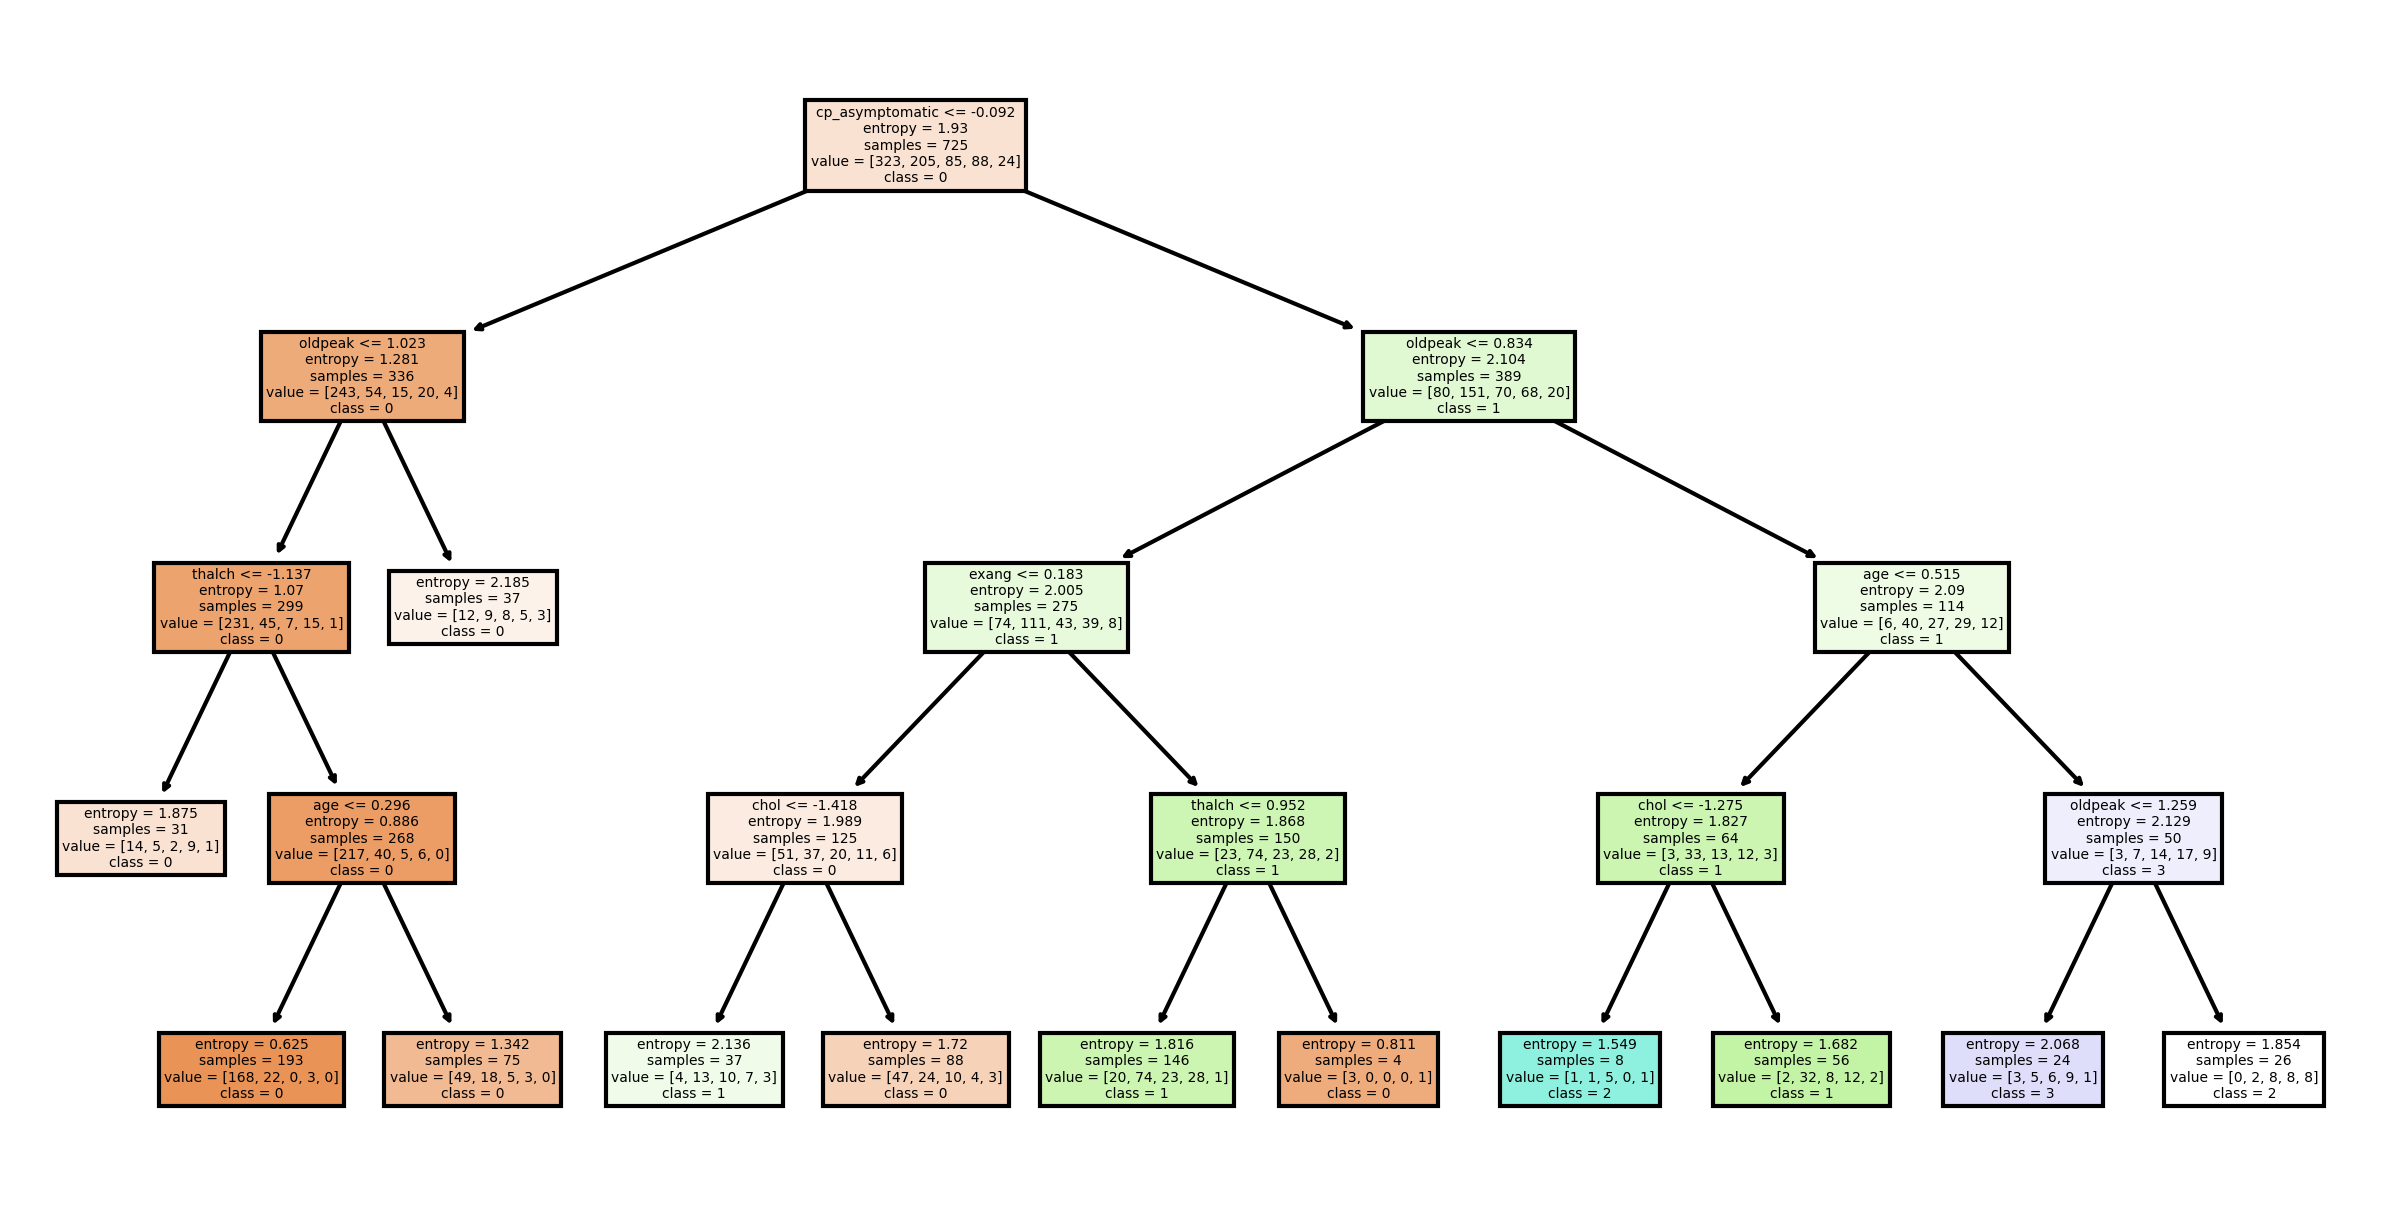

In [45]:
tree.plot_tree(model_en_4,
               feature_names = fn,
               class_names = cn,
               filled = True)

In [46]:
preds = model_en_4.predict(x_test)
pd.Series(preds).value_counts()

0    111
1     56
2     11
3      4
Name: count, dtype: int64

In [47]:
pd.crosstab(y_test, preds)

col_0   0   1  2  3
num                
0      68   6  1  1
1      27  30  2  1
2       8  10  5  0
3       7   9  2  1
4       1   1  1  1

In [48]:
# Accuracy
np.mean(preds == y_test)
# Only 57% accuracy

0.5714285714285714

* Max Depth = 5

In [91]:
model_en_5 = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
model_en_5.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.42452830188679247, 0.9166666666666666, 'cp_asymptomatic <= -0.092\ngini = 0.692\nsamples = 725\nvalue = [323, 205, 85, 88, 24]\nclass = 0'),
 Text(0.1509433962264151, 0.75, 'chol <= -1.351\ngini = 0.445\nsamples = 336\nvalue = [243, 54, 15, 20, 4]\nclass = 0'),
 Text(0.05660377358490566, 0.5833333333333334, 'cp_typical angina <= 2.074\ngini = 0.733\nsamples = 35\nvalue = [11, 10, 9, 5, 0]\nclass = 0'),
 Text(0.03773584905660377, 0.4166666666666667, 'thalch <= -1.958\ngini = 0.725\nsamples = 32\nvalue = [11, 10, 6, 5, 0]\nclass = 0'),
 Text(0.018867924528301886, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0]\nclass = 3'),
 Text(0.05660377358490566, 0.25, 'thalch <= 1.624\ngini = 0.704\nsamples = 30\nvalue = [11, 10, 6, 3, 0]\nclass = 0'),
 Text(0.03773584905660377, 0.08333333333333333, 'gini = 0.686\nsamples = 28\nvalue = [11, 10, 4, 3, 0]\nclass = 0'),
 Text(0.07547169811320754, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]\nclass = 2'),
 Text(

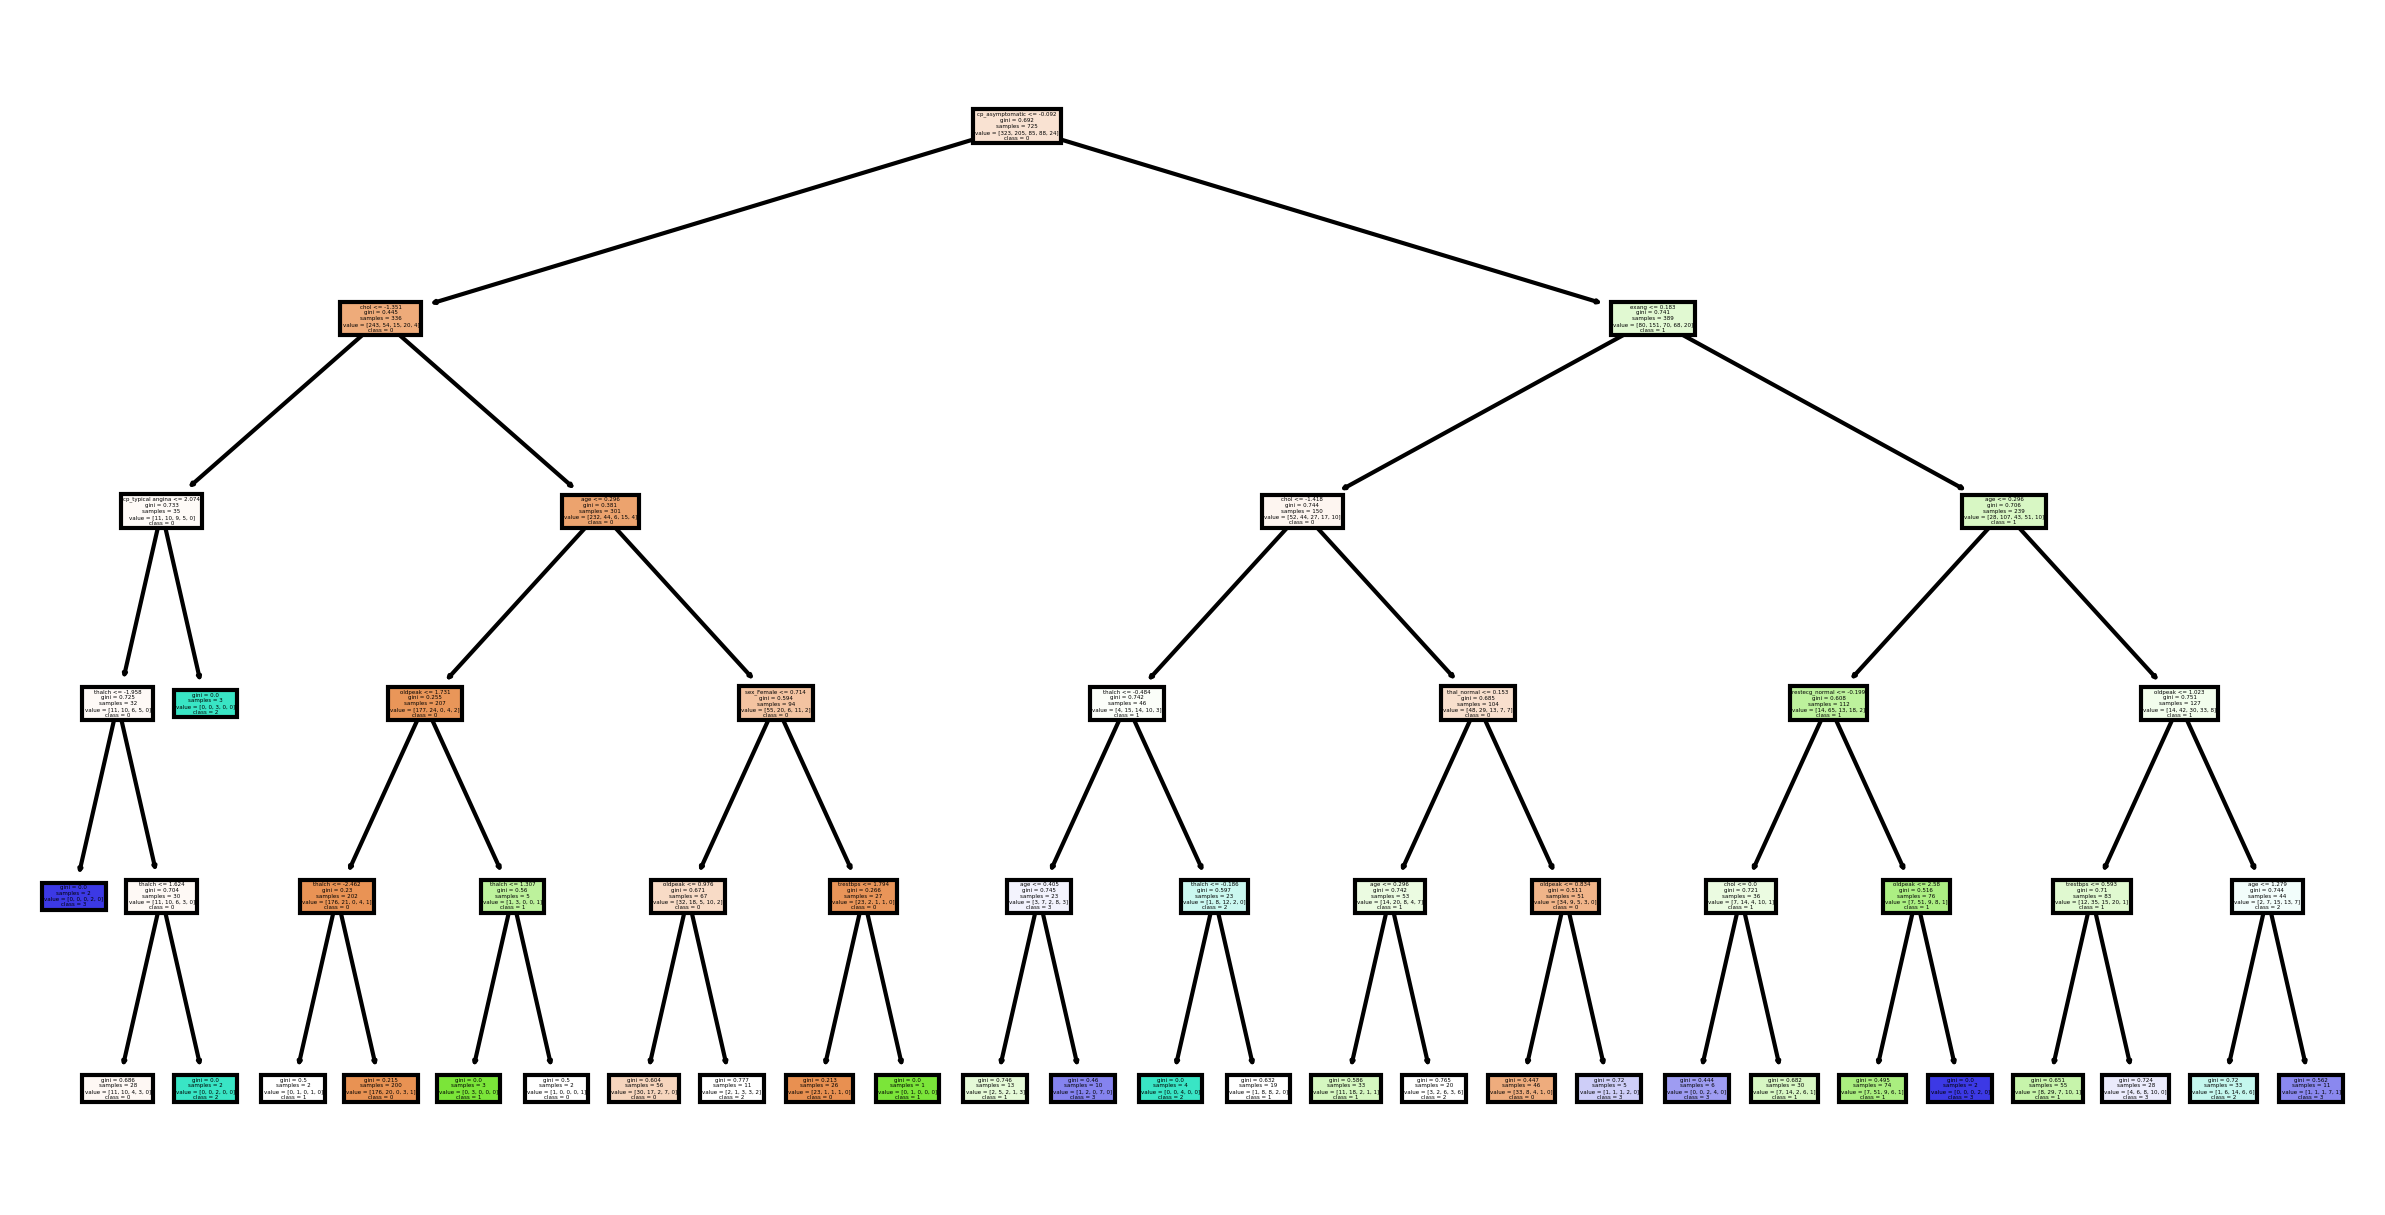

In [92]:
tree.plot_tree(model_en_5,
               feature_names = fn,
               class_names = cn,
               filled = True)

In [93]:
# Predicting the test data
preds = model_en_5.predict(x_test)
pd.Series(preds).value_counts()

0    84
1    57
2    23
3    18
Name: count, dtype: int64

In [94]:
model_en_5.feature_importances_
# cp_asymptomatic is the most important feature

array([0.13746505, 0.02840836, 0.11527163, 0.        , 0.08251014,
       0.05061808, 0.09086487, 0.02339051, 0.        , 0.40088938,
       0.        , 0.        , 0.01556766, 0.        , 0.01849677,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03651756, 0.        ])

In [95]:
pd.crosstab(y_test, preds)

col_0   0   1  2  3
num                
0      62  10  4  0
1      14  28  9  9
2       4  10  5  4
3       3   8  3  5
4       1   1  2  0

In [96]:
# Accuracy
np.mean(preds == y_test)
# Only 54% accuracy

0.5494505494505495

#### HyperParameter Tuning using the GridSearchCV

In [82]:
param_dist = {
    "criterion":["entropy","gini"],
    "max_depth":[1,2,3,4,5,6,7,None],
    "min_samples_split":[5,10,15,20,25,30,35,40,45,50,100,None]
}

In [83]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid=param_dist, cv=10, n_jobs=-1)

In [84]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'min_samples_split': [5, 10, 15, 20, 25, 30, 35, 40,
                                               45, 50, 100, None]})

In [85]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=35)

In [86]:
grid.best_score_

0.5503234398782344

In [87]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 35}

###6. Model Evaluation and Analysis:
* Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
* Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [88]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=35)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=35)

[Text(0.4928571428571429, 0.9285714285714286, 'cp_asymptomatic <= -0.092\nentropy = 1.93\nsamples = 725\nvalue = [323, 205, 85, 88, 24]\nclass = 0'),
 Text(0.24285714285714285, 0.7857142857142857, 'oldpeak <= 1.023\nentropy = 1.281\nsamples = 336\nvalue = [243, 54, 15, 20, 4]\nclass = 0'),
 Text(0.18571428571428572, 0.6428571428571429, 'thalch <= -1.137\nentropy = 1.07\nsamples = 299\nvalue = [231, 45, 7, 15, 1]\nclass = 0'),
 Text(0.15714285714285714, 0.5, 'entropy = 1.875\nsamples = 31\nvalue = [14, 5, 2, 9, 1]\nclass = 0'),
 Text(0.21428571428571427, 0.5, 'age <= 0.296\nentropy = 0.886\nsamples = 268\nvalue = [217, 40, 5, 6, 0]\nclass = 0'),
 Text(0.11428571428571428, 0.35714285714285715, 'cp_atypical angina <= 0.825\nentropy = 0.625\nsamples = 193\nvalue = [168, 22, 0, 3, 0]\nclass = 0'),
 Text(0.05714285714285714, 0.21428571428571427, 'trestbps <= 0.838\nentropy = 0.876\nsamples = 98\nvalue = [77, 18, 0, 3, 0]\nclass = 0'),
 Text(0.02857142857142857, 0.07142857142857142, 'entropy 

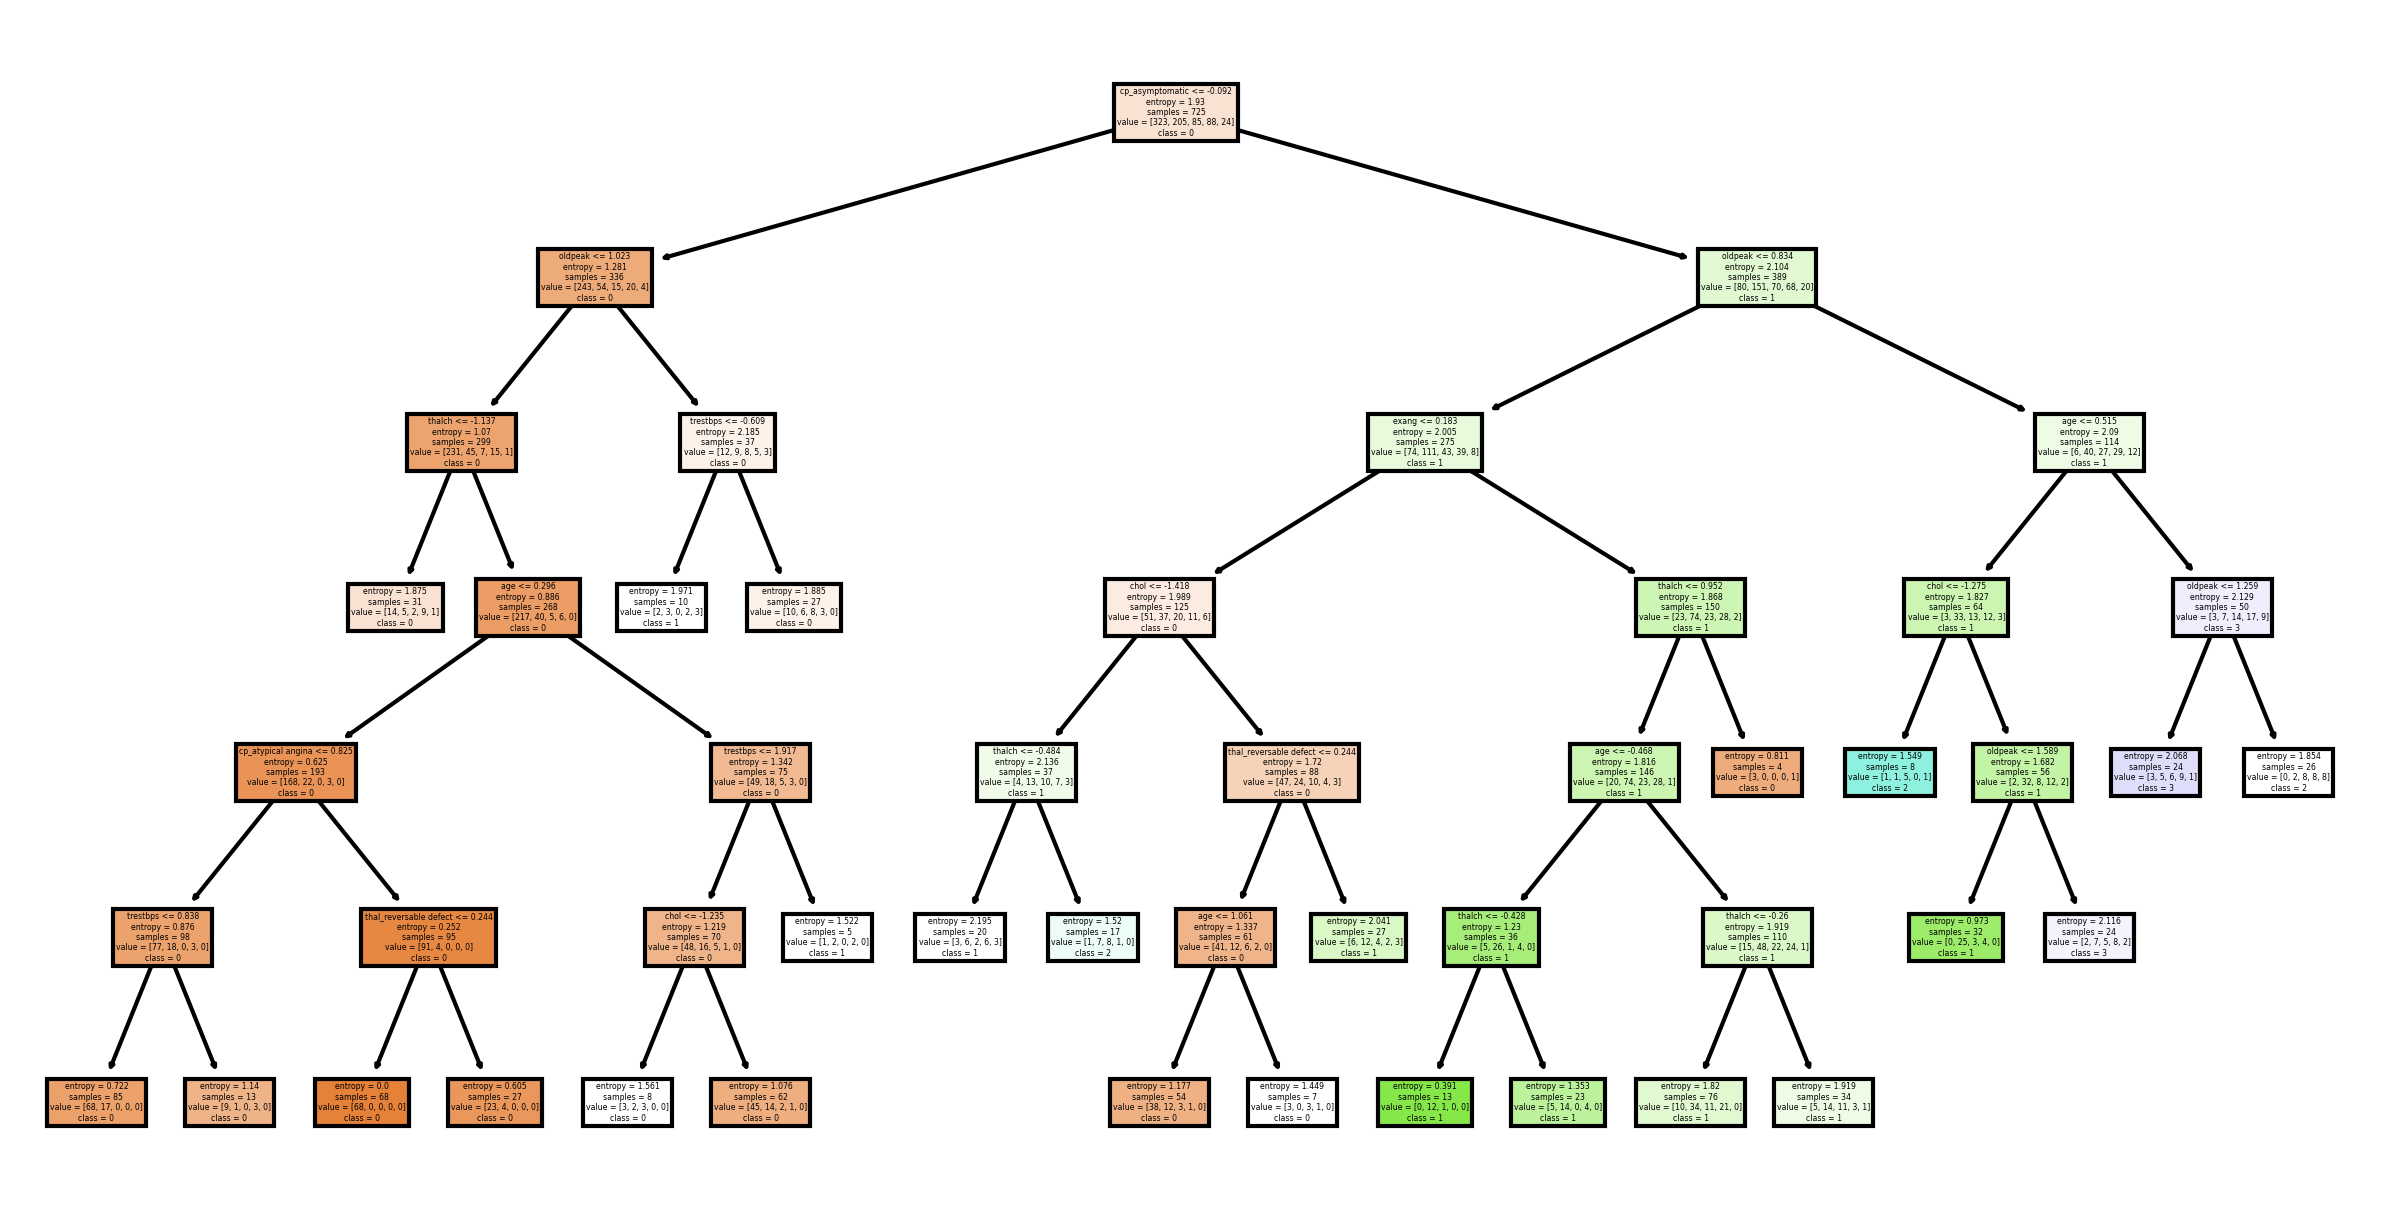

In [89]:
tree.plot_tree(model,
               feature_names = fn,
               class_names = cn,
               filled = True)

In [90]:
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75        76
           1       0.47      0.47      0.47        60
           2       0.42      0.35      0.38        23
           3       0.17      0.05      0.08        19
           4       0.00      0.00      0.00         4

    accuracy                           0.56       182
   macro avg       0.35      0.34      0.34       182
weighted avg       0.50      0.56      0.52       182



###Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
2. What is the difference between the Label encoding and One-hot encoding?


###Answers

1. There are some hyperparameters in Decision tree, such as

* Criteria : The quality of the split measured either by 'Gini-Impurity' or 'Entropy/Information Gain.
* Max_Depth : The depth of the tree from root node to farthest leaf node. When the depth is low then model might be underfitting and vice a versa when the depth is high then model might be overfitting.
* Min_Sample_Split : Minimum number of samples that are needed to split a node. According to the number of samples for node splitting, overfitting and underfitting problem might happen
* Similarly, there are hyperparameters like Min_Sample_Leaf, Max_Features.

2. Label encoding and One-hot encoding are the encoding techniques which are used to convert the categorical columns into the numerical. Label encoding converts the categorical column into a single column by assigining an integer labeled class to the unique value in a column while one-hot encoding converts the categorical column into multiple columns by assigning a binary integer to each created columns. Label encoding is used when the Y or target variable is categorical whereas one-hot encoding is used when the X or independent variables are categorical.